### Project Description
You work in the online store "Streamchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's imagine that it's December 2016, and you're planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers".

## Description of column names
* Name — the name of the game
* Platform — platform
* Year_of_Release — year of release
* Genre — the genre of the game
* NA_sales — sales in North America (millions of dollars)
* EU_sales — sales in Europe (millions of dollars)
* JP_sales — sales in Japan (millions of dollars)
* Other_sales — sales in other countries (millions of dollars)
* Critic_Score — critics' score (maximum 100)
* User_Score — users' score (maximum 10)
* Rating — rating from the ESRB organization (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

## 1. Explore basic info.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [22]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [23]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [25]:
df.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

**Output:** 
* There are missing values in six columns.
* Incorrect data types
* Column names are capitalized and heterogeneous.

## 2.  Data preprocessing

In [26]:
df.duplicated().sum() # there are no obvious duplicates

0

In [27]:
df.columns = df.columns.str.lower()
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9874,Deca Sports Extreme,3DS,2011.0,Sports,0.08,0.0,0.03,0.01,52.0,tbd,E


In [28]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [29]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* The name column is responsible for the name of the game. It is impossible to leave it blank, and it is also impossible to fill it with median or average values. Perhaps the omissions are due to the fact that it was simply not filled in or the game did not have a name at that time. These omissions, as well as genre omissions, will simply be deleted. I think they have the same reasons for their appearance, and they are identical.

In [30]:
df = df.dropna(subset=['name', 'genre'])

* In the year_of_release column (year of release) there is a year in the name of the game, if you fill in the years (medians, averages) that do not correspond to the years in the name, it is not entirely logical and will raise questions. The omission in this column could have occurred due to the fact that when filling in the game data, they forgot to specify the year or the exact release date of the game is not precisely determined. I'll just delete these omissions as well.

In [31]:
df = df.dropna(subset=['year_of_release'])

In [32]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [33]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In addition to NaN, we have the string 'tbd' by the user_score field

In [34]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


* The abbreviation does not hide any mysterious meanings and is deciphered very simply - To Be Determined, that is, "To be determined". Which, in principle, is logical to note as NaN. I will replace all 'tbd' with NaN. And I will change the data type to float, since the column according to the description should contain a user rating.

In [35]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN).astype(float)

In [36]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* The rating field has an object data type with alphanumeric designations and it is not logical to bring it to other types, you can change the values to something more understandable, according to the explanations of the ESRB age ratings.
* Age ratings are also accompanied by descriptions that indicate what the video game content may contain, such as profanity, fear and violence. But I will not prescribe it here, I will limit myself to categories.
* * I will only replace NaN with the category 'Undefined'
"KA' as I understand it now is 'E10+' so I assigned them 'Suitable for persons over 10 years old'

In [37]:
display = {'E': 'Suitable for all age categories',
np.NaN: 'Undefined',
'M': 'Suitable for persons over 17 years old',
'T': 'Suitable for persons over 13 years old',
'E10+': 'Suitable for persons over 10 years old',
'K -': 'Suitable for persons over 10 years old',
'AO': 'Suitable for adults over 18',
'EU': 'For younger children',
'RP': 'not yet assigned a category'
}
df['rating'] = df['rating'].replace(display)


In [38]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Suitable for all age categories
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Suitable for all age categories
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Suitable for all age categories
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined


The gaps in the critic_score and user_score fields also cannot be filled with average values, there are a lot of them and such fillings can distort the analysis. Perhaps some indicator values will be more appropriate for us. I will replace Nan with -1

In [39]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


A separate column with the sum of sales for all regions 'sales_total'

In [40]:
summ = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['sales_total'] = df[summ].sum(axis= 1) 
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
2410,Mercenaries 2: World in Flames,PS3,2008,Shooter,0.29,0.39,0.02,0.16,72.0,7.1,Suitable for persons over 13 years old,0.86


### Output
* Renamed columns for better readability.
* Checked the dataframe for duplicates
* Deleted lines that do not have a name and genre, they were identical
* Brought the data to the types needed for analysis
* Changed NaN to the indicator value -1
* Figured out the abbreviations 'tbd' and ESRB.
Now the dataframe has no gaps cleared of trash and is ready for further analysis.

In [85]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': value NaN',temp[col_l].isna().sum(),
        ', procent NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales_total      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 3. Research data analysis

Text(0, 0.5, 'Number of Games')

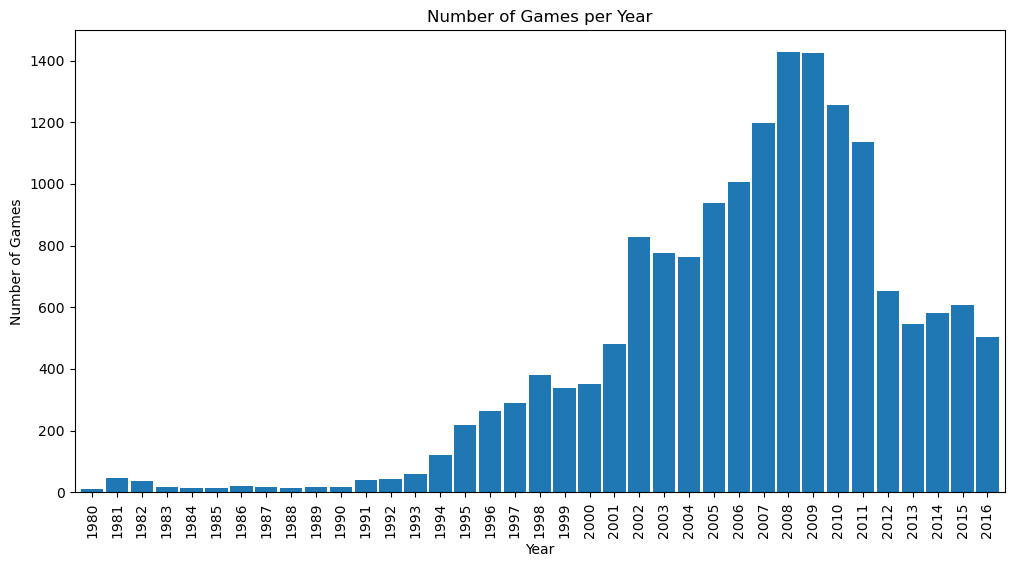

In [42]:
game_counts_by_year = df.groupby('year_of_release')['name'].count()
game_counts_by_year.plot(kind='bar', figsize=(12, 6), width = 0.9)
plt.title('Number of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')

Until 1994, the games were released very limited (as probably the platforms for the game) and then the growth began, which peaked in 2008 -2009. Then a certain decline began, associated with the rapid development of social networks, mobile phones that have their own operating systems and games for them are not represented here in this dataset (I think they have squeezed out a decent market share). Therefore, it makes no sense to take anything into account until 1994.

Text(0, 0.5, 'Platform')

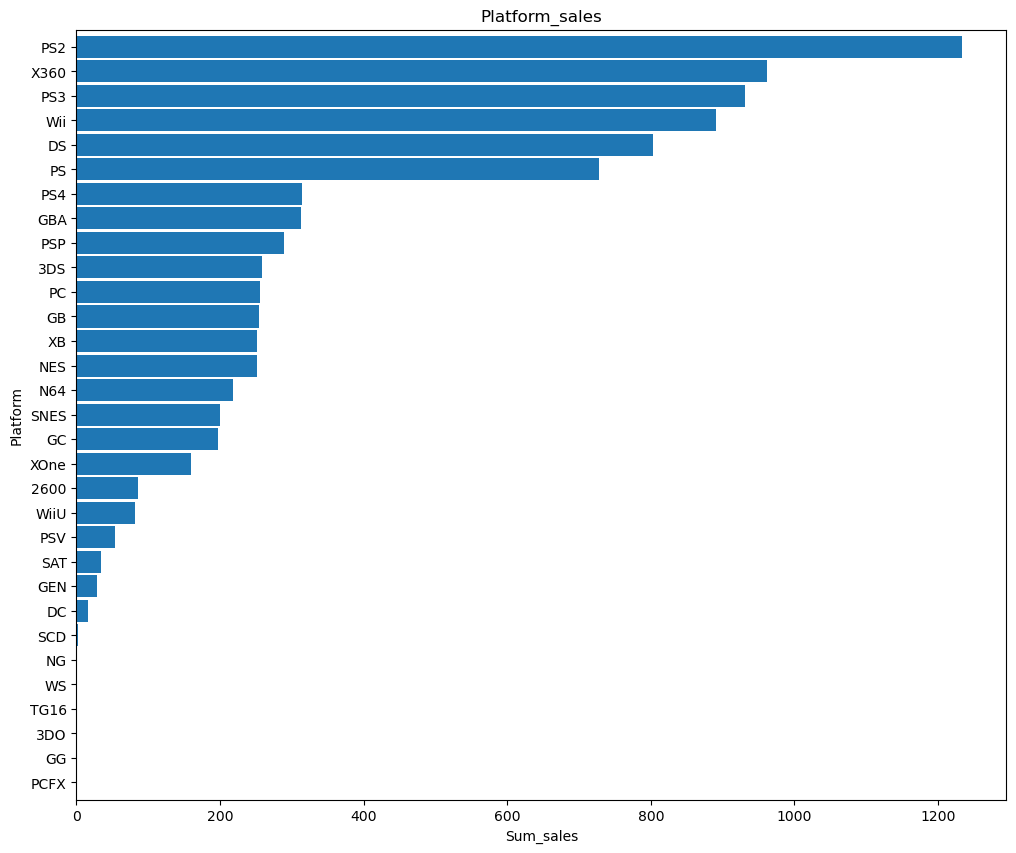

In [43]:
platform_sales = df.groupby('platform')['sales_total'].sum().sort_values()
platform_sales.plot(kind='barh', figsize=(12, 10), width = 0.9)
plt.title('Platform_sales')
plt.xlabel('Sum_sales')
plt.ylabel('Platform')

The leader of PS2, then XBOX 360 and again PS only 3 versions, everything is visible on the graph. Only after the 6th place there is a decent failure, where sales are noticeably lower, among them both new releases of platforms that will gain popularity and sales, and little-known brands.

In [44]:
top_platforms = platform_sales.sort_values(ascending=False).head(6)

Text(0, 0.5, 'Total Sales')

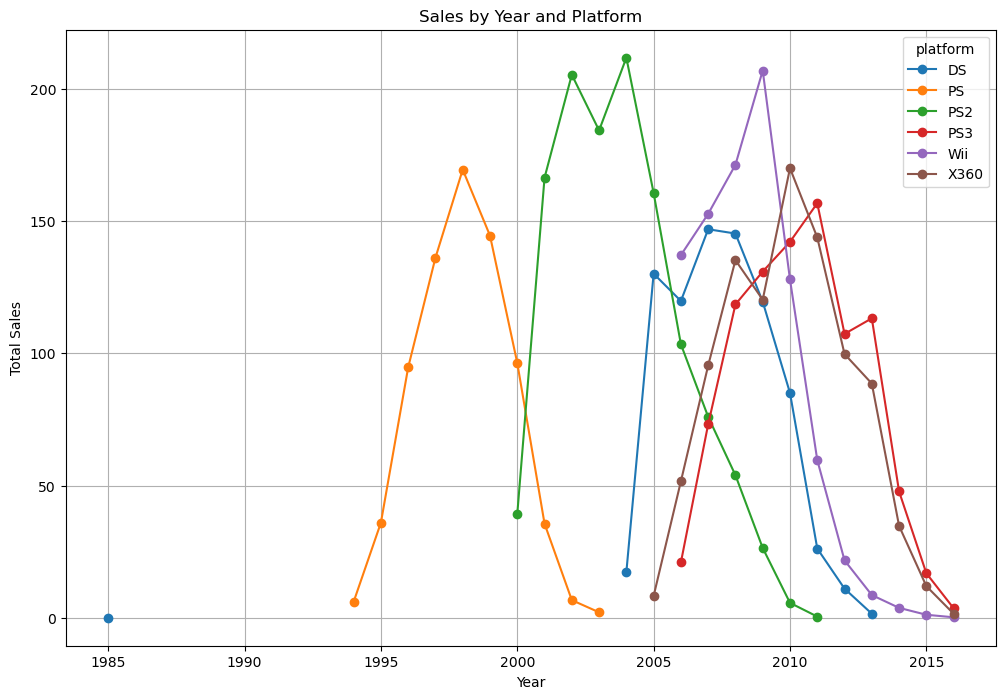

In [45]:
# List of analysing platforms
platforms = top_platforms.index.tolist()

# Group data
platform_sales_by_year = df[df['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()

# Create chart
platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

In [46]:
df[(df['year_of_release']== 1985) & (df['platform'] == 'DS')] # Явный артефакт платформа вышла в 2004 году

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,Undefined,0.02


In [47]:
df = df.drop(index= 15957 )

Text(0, 0.5, 'Total Sales')

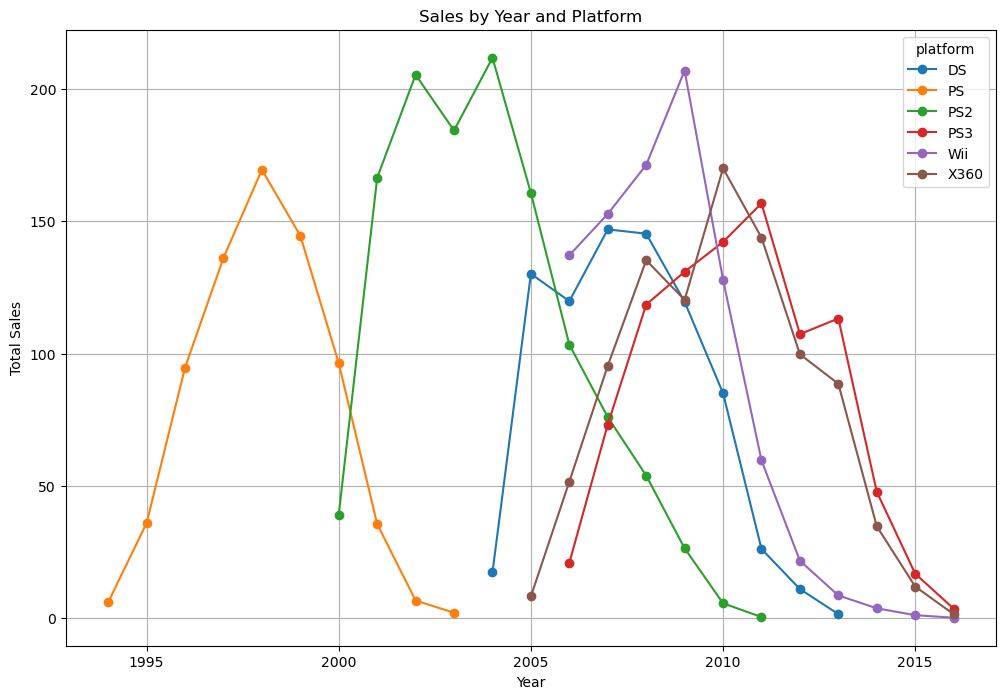

In [48]:
# Список платформ для анализа
platforms = top_platforms.index.tolist()

# Группируем данные по годам и платформам
platform_sales_by_year = df[df['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()

# Строим график
platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

* The DS console was released in 2004 in Canada, the USA and Japan (therefore, the artifact was removed from 1985). Since 2004, popularity has been growing, peaking in 2008 and dying by 2013. Active for 8 years;

* PS - lived from 1994 to 2003, almost 10 years;

* PS2 - from 2000 to 2011 - 11 years;

* PS3 - since 2006 began to lose ground strongly with the release of the PS4 in 2013;

* Wii - from 2006 to 2016, there is no further data for 10 years, but for sure it was losing ground and outliving itself. Conclusion:the average console lives 10 years. And somewhere in these intervals from 5 to 7 years, at a certain decline, new versions will be released. Well, or death without continuation in the descendants.

In [49]:
actual_time = df.query('year_of_release >= 2012') # только строки, в которых год релиза игры больше или равен 2012 году

In [50]:
# I am creating a summary table that summarizes the sales for each platform for each year of the game 's release
actual_platform_sales_by_year = actual_time.groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack() 
actual_platform_sales_by_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Total Sales')

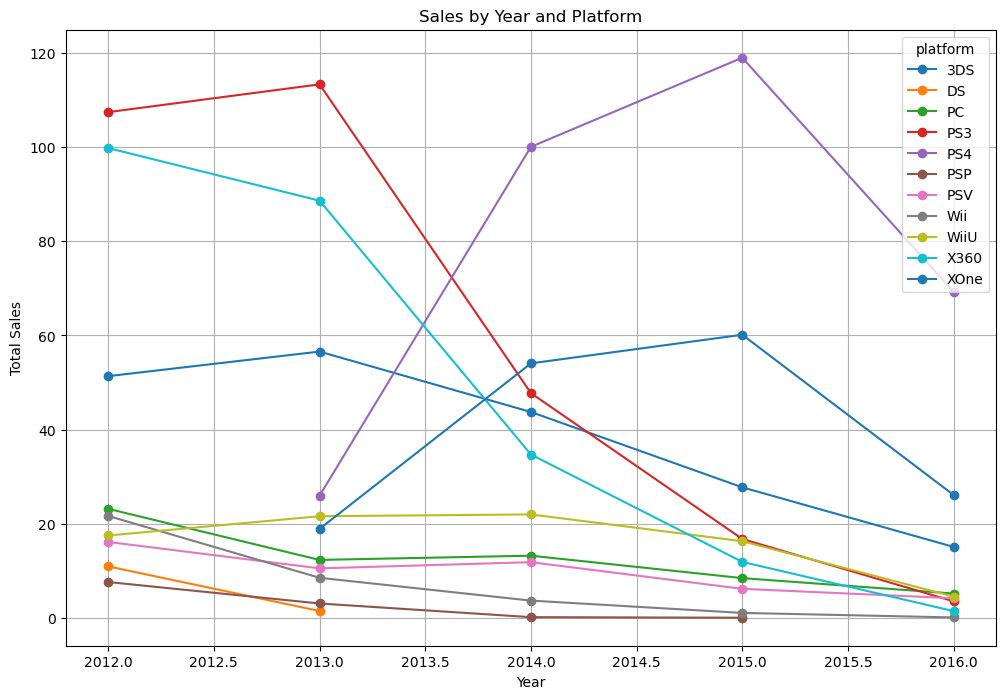

In [51]:
# Create chart
actual_platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Sales by Year and Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

1.   The actual period, as our research has shown, is a period of less than 5 years, more than 2 full years. 
2.   As can be seen from the graph for 2016, all platforms are on the decline, the games market is sagging. Top 3 in sales of PS4, XboxOne, 3DS, they are potentially profitable.
3. PC as the longest-living platform also probably needs to be highlighted, although sales on it are not significant. Probably because of piracy and hacking.

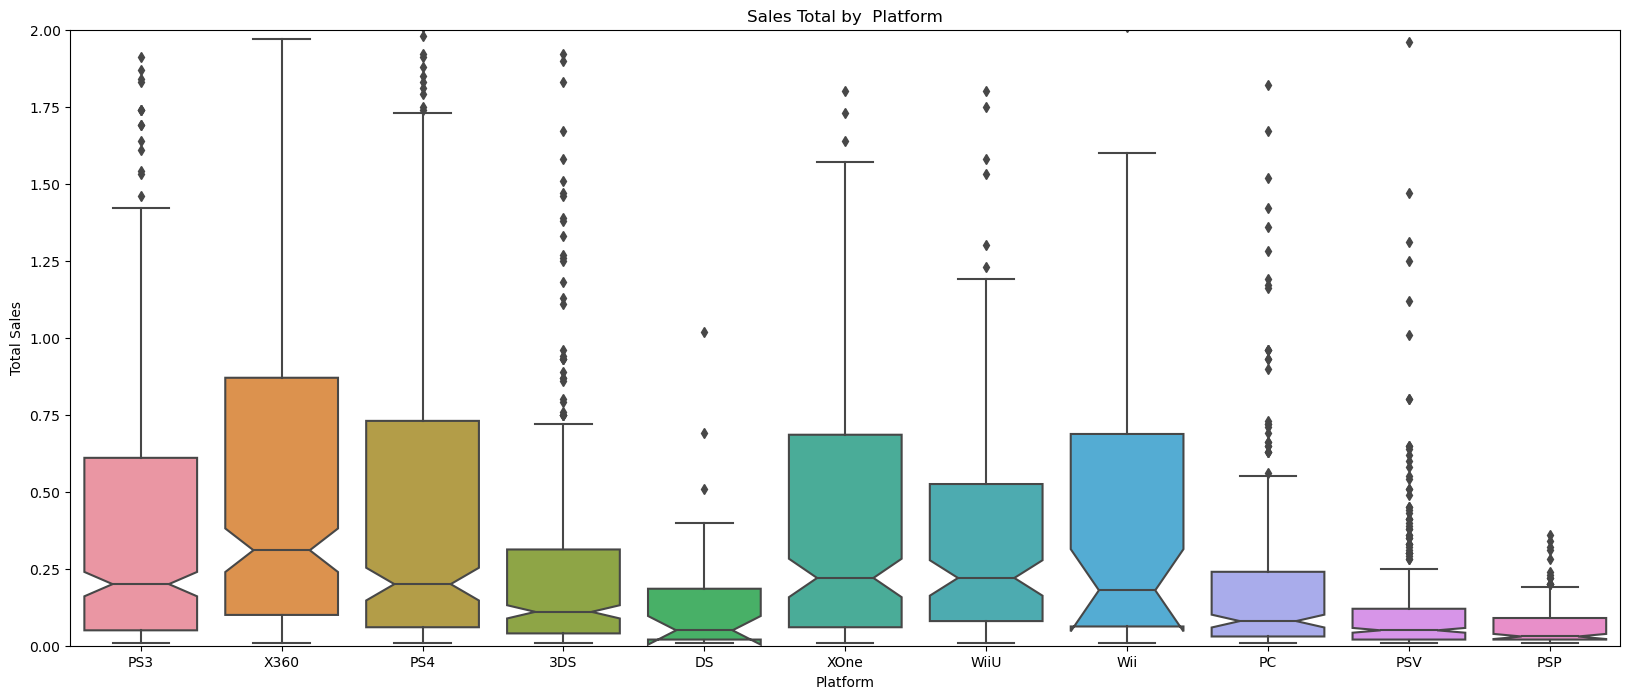

In [52]:
afig = plt.subplots(figsize=(20, 8))
sns.boxplot(data= actual_time, x='platform', y = 'sales_total', notch=True)
plt.ylim(0, 2)
plt.title('Sales Total by  Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

In [53]:
actual_time.groupby('platform')['sales_total'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


*  The most successful games are sold on XBOX 360, PS4, PS3, XBOX ONE.
* It is noticeable that almost all platforms have most of the values greater than the median
* Releases of exclusives for certain platforms probably have an impact and they are sold more successfully.
*  Here you need to take into account backward compatibility on the XBOX ONE console, you can also play games that were released for XBOX 360

In [54]:
# Комментарий ревьюера 2
print(len(actual_time.query("critic_score > 0")))
print(len(actual_time.query("user_score > 0")))
print(len(actual_time.query("critic_score > 0 and user_score > 0")))

1312
1531
1297


<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

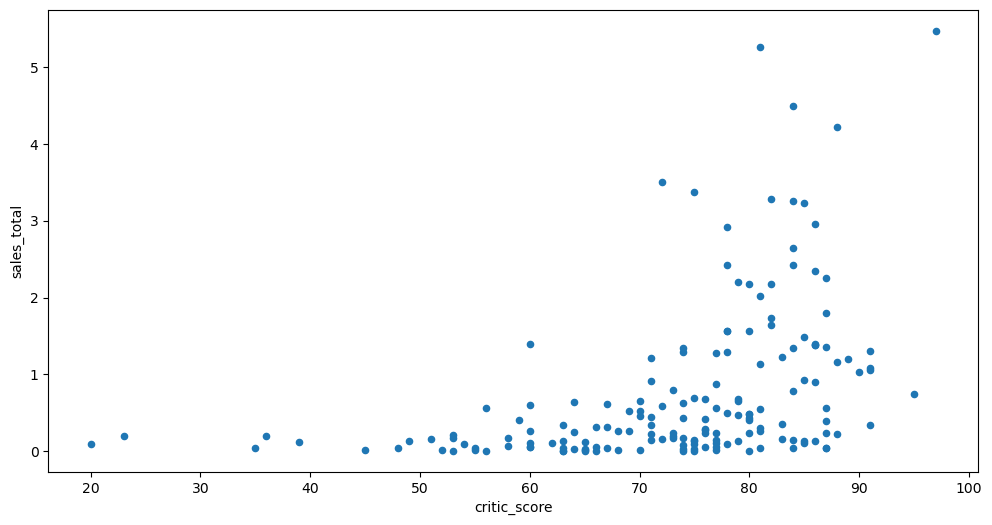

In [55]:
xbox_one = actual_time.query("platform == 'XOne' and critic_score > 0") # Вспоминаем что поэтим полям у нас индикаторное значение -1(заглушки)
xbox_one.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(12,6))

When the average rating from critics increases, the average sales of games also increase. The better the game, according to critics, the more profit it brings to both the platform and publishers.

<AxesSubplot:xlabel='user_score', ylabel='sales_total'>

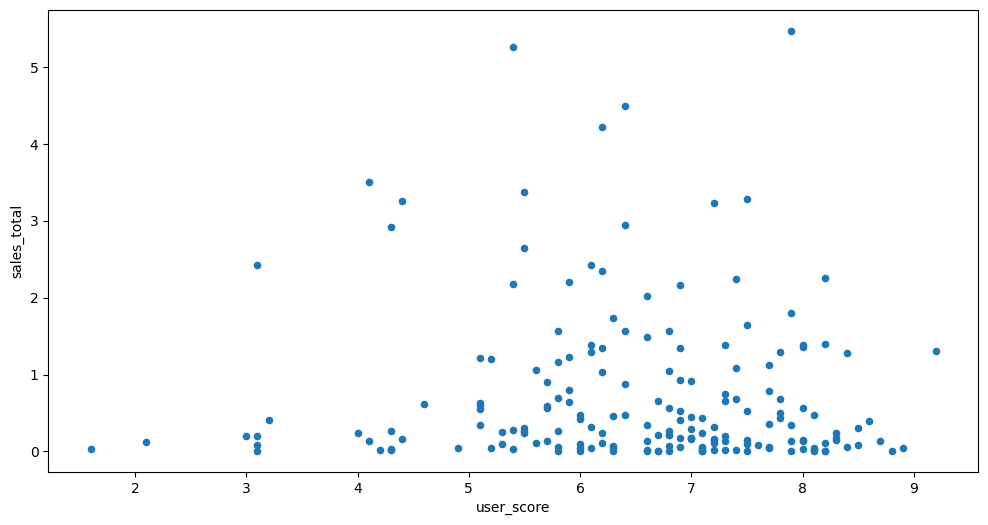

In [56]:
xbox_one = actual_time.query("platform == 'XOne' and user_score > 0")
xbox_one.plot(kind='scatter', x='user_score', y='sales_total', figsize=(12,6))

The story with the user rating is similar. But there are also outliers when the user rating is low, and the game sells well.

<AxesSubplot:>

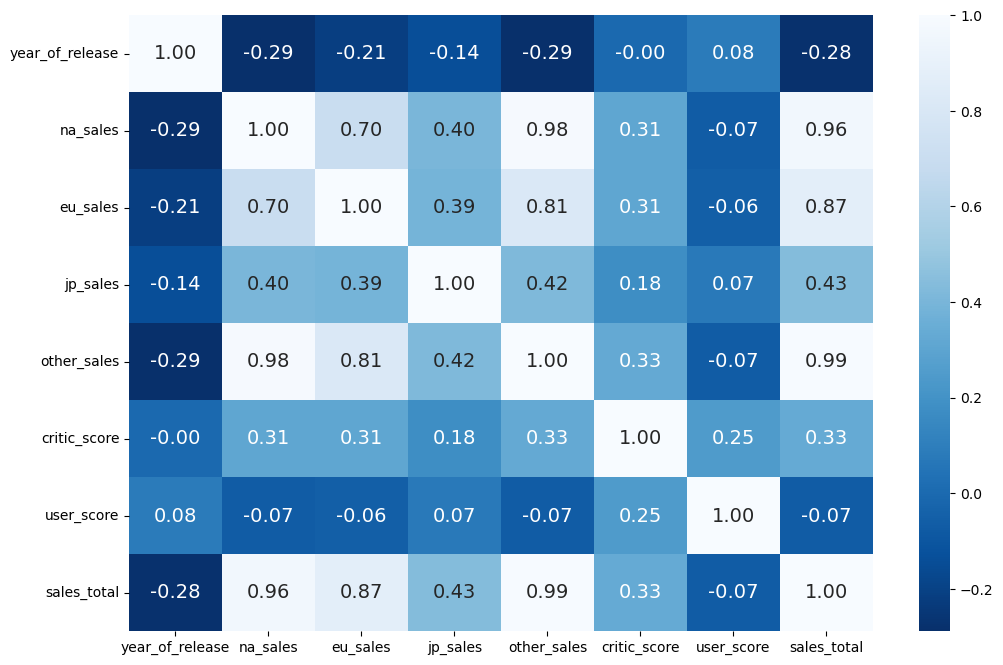

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(xbox_one.corr(), annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})

From the correlation graph, it can be seen that the critics' rating with high sales, but the user's rating practically does not affect sales (the correlation is weakly negative).

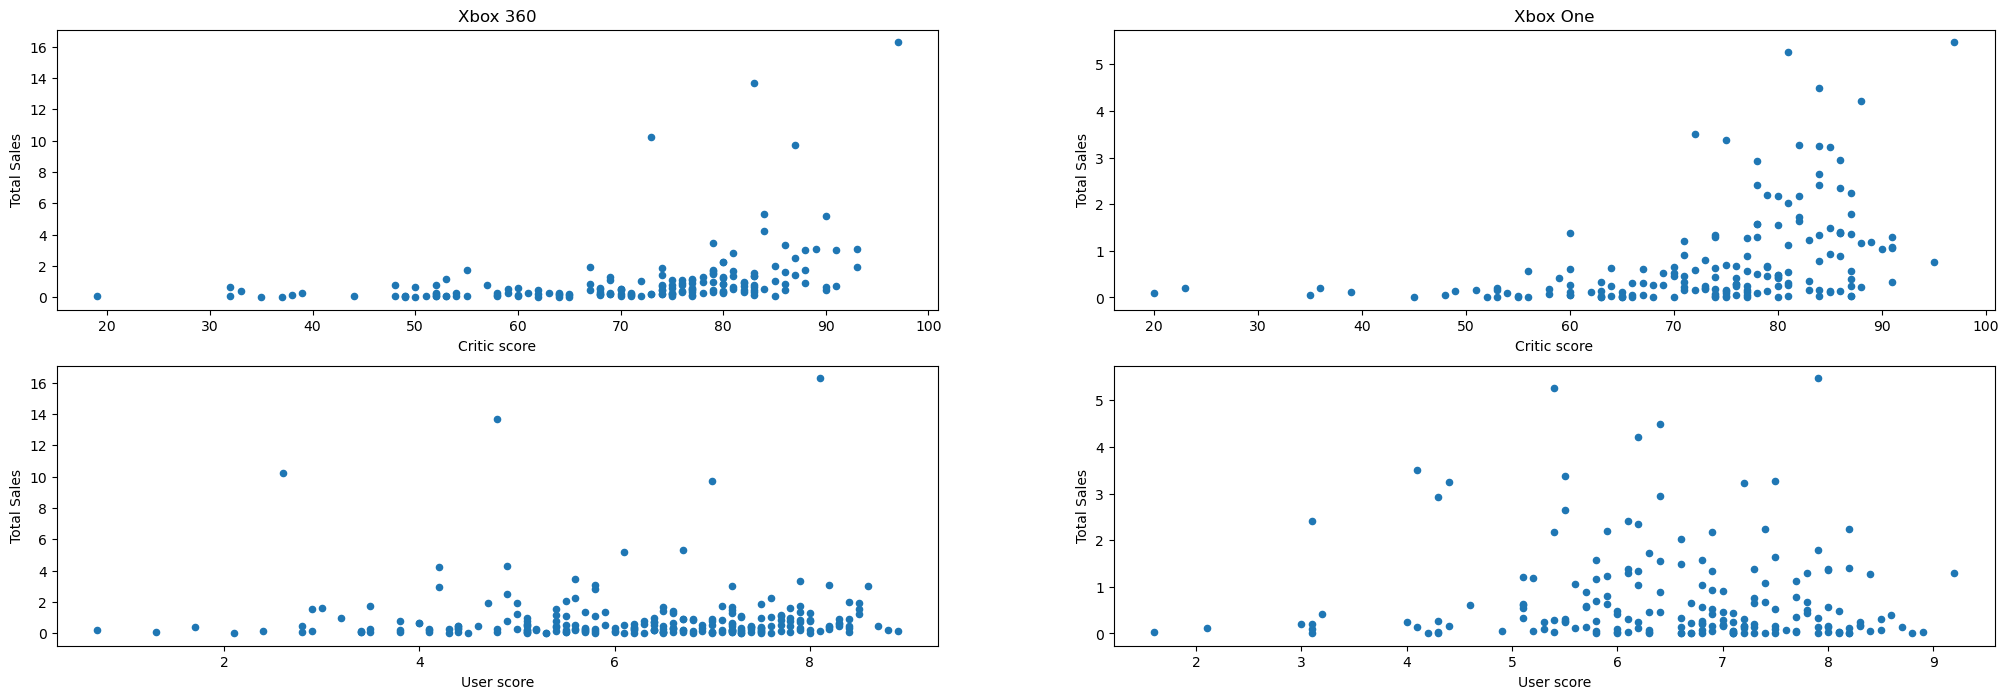

In [58]:
xbox_360_critic = actual_time.query("platform == 'X360' and critic_score > 0") 
xbox_360_user = actual_time.query("platform == 'X360' and user_score > 0")
xbox_one_critic = actual_time.query("platform == 'XOne' and critic_score > 0")
xbox_one_user = actual_time.query("platform == 'XOne' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

xbox_360_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('Xbox 360')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic score')

xbox_360_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User score')

xbox_one_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('Xbox One')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic score')

xbox_one_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User score')
plt.show()

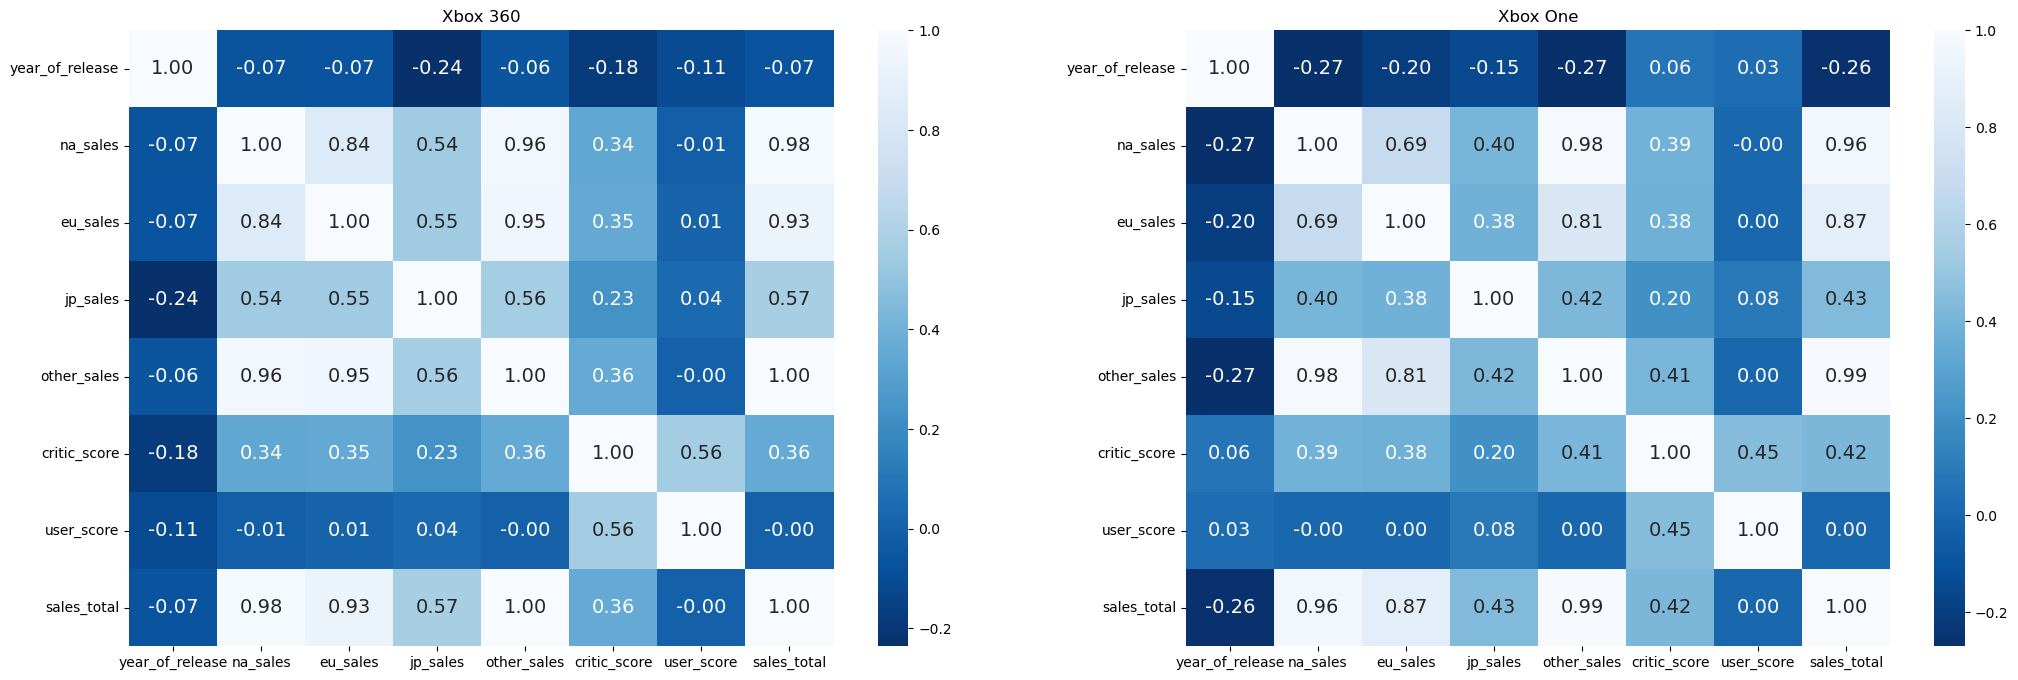

In [59]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(xbox_360_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('Xbox 360')

sns.heatmap(xbox_one_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('Xbox One')
plt.show()

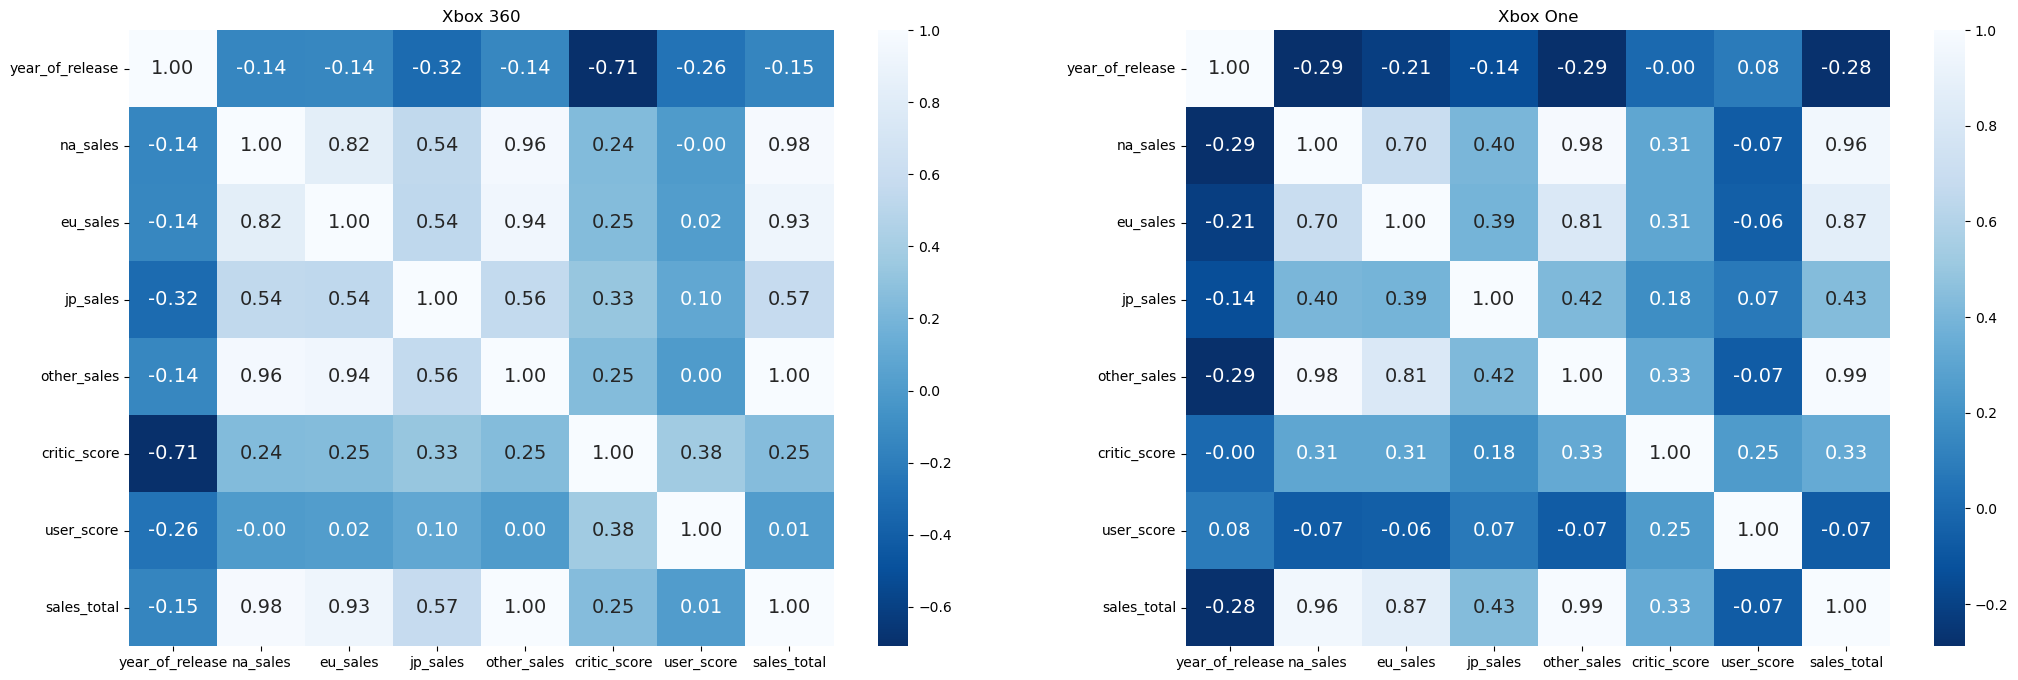

In [60]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(xbox_360_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('Xbox 360')

sns.heatmap(xbox_one_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('Xbox One')
plt.show()

* * It can be seen from the graphs that critics' ratings affect sales on both Xbox platforms (which is confirmed by correlation analysis)
* * The user rating, on the contrary, is near-zero or weakly negative on any of the Xbox and with user_score ratings > 0 and with critic_score rating > 0.

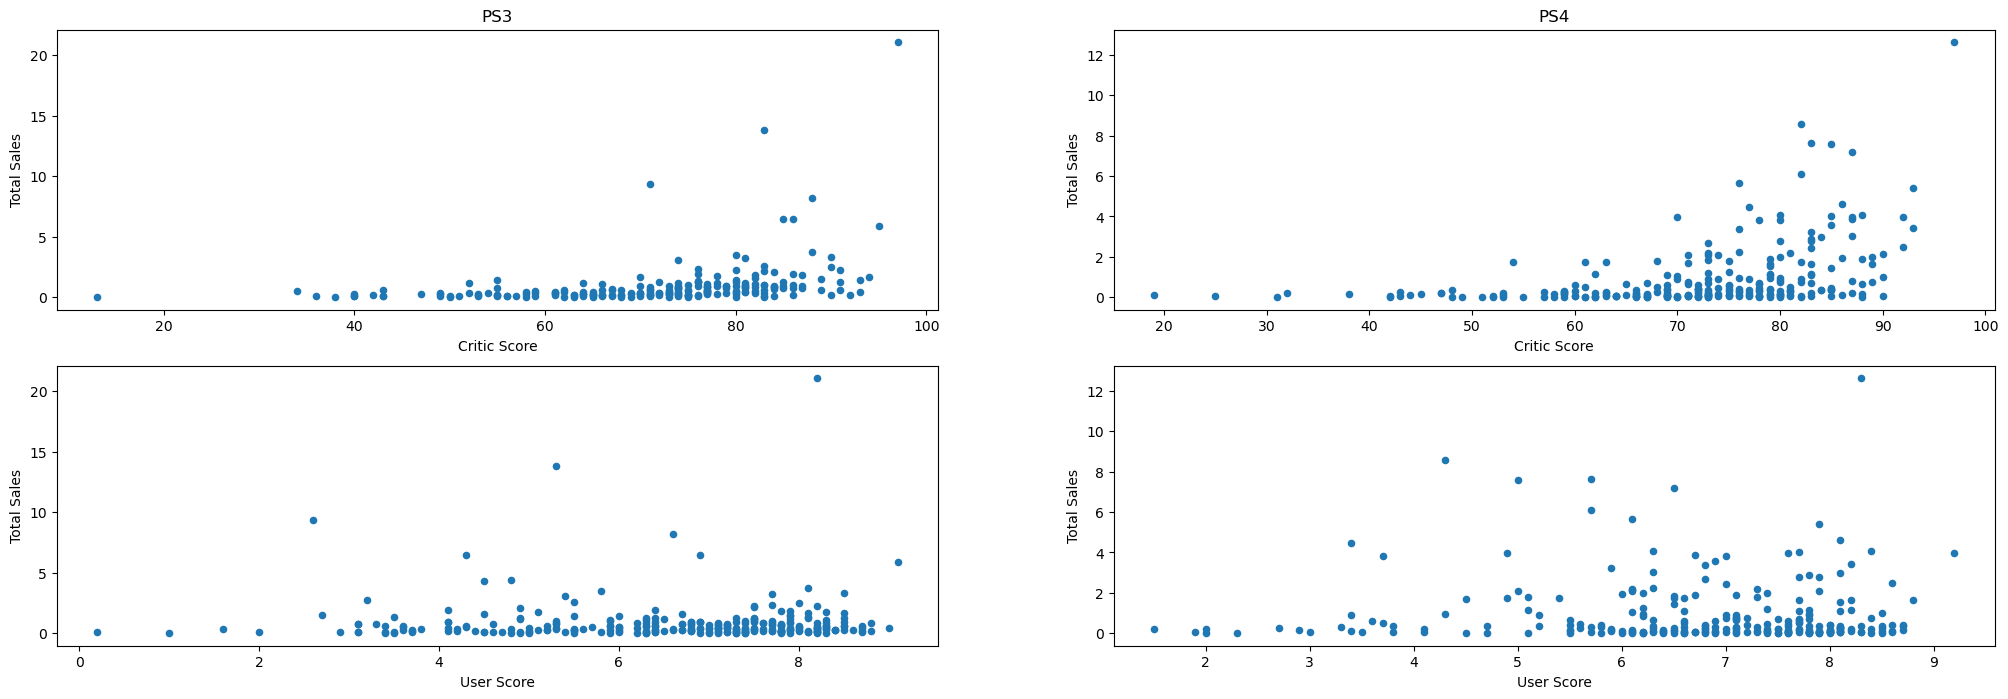

In [61]:
ps3_critic = actual_time.query("platform == 'PS3' and critic_score > 0") 
ps3_user = actual_time.query("platform == 'PS3' and user_score > 0")
ps4_critic = actual_time.query("platform == 'PS4' and critic_score > 0") 
ps4_user = actual_time.query("platform == 'PS4' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

ps3_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('PS3')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic Score')

ps3_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User Score')

ps4_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('PS4')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic Score')

ps4_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User Score')
plt.show()

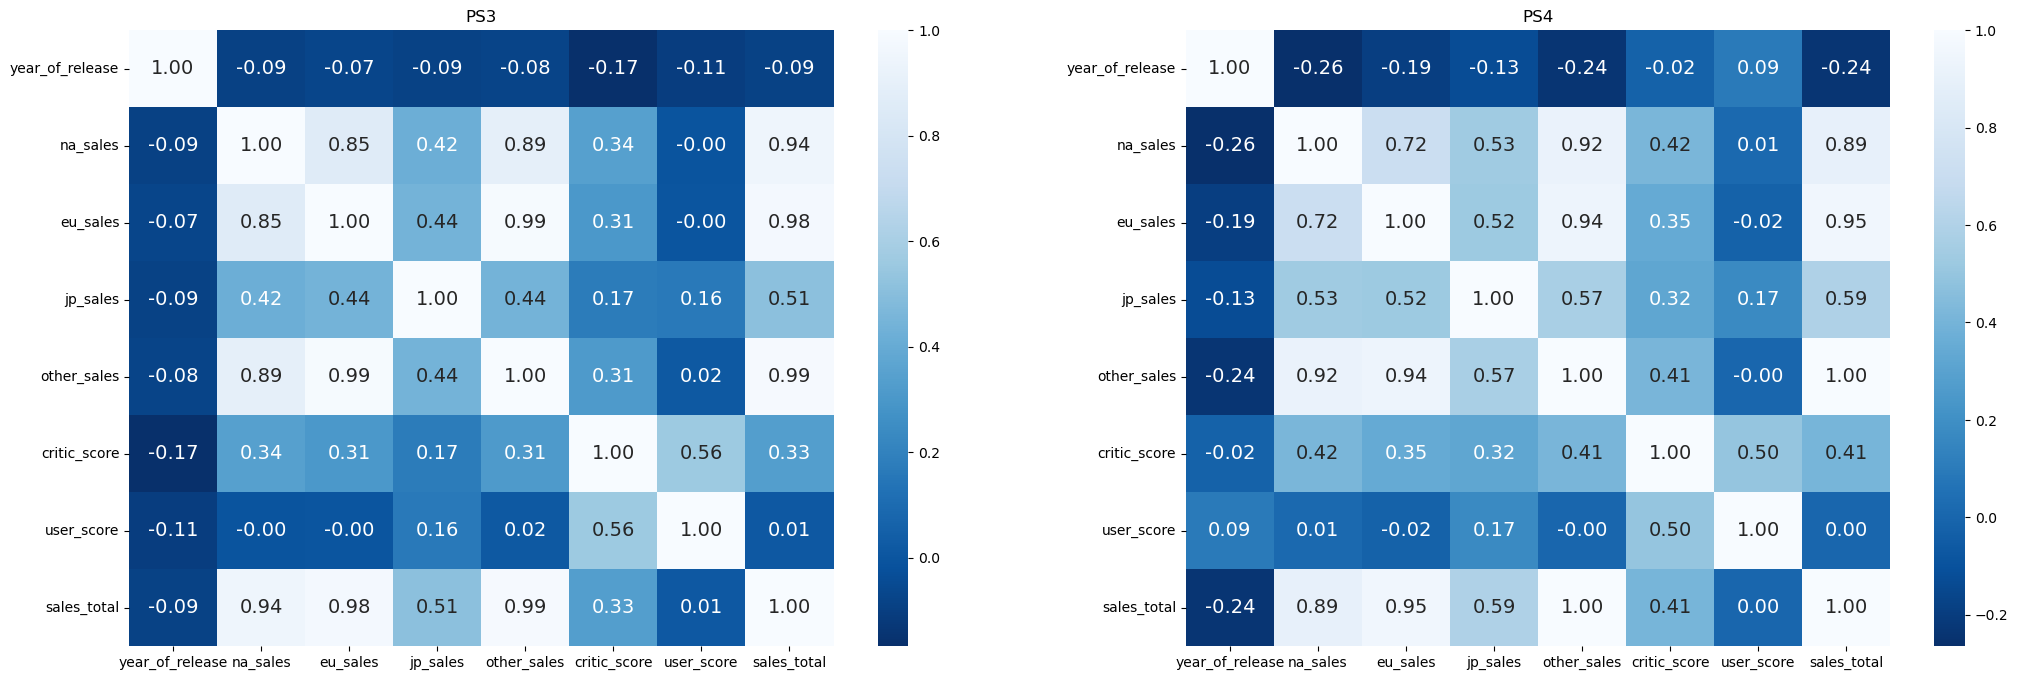

In [62]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(ps3_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('PS3')

sns.heatmap(ps4_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('PS4')
plt.show()

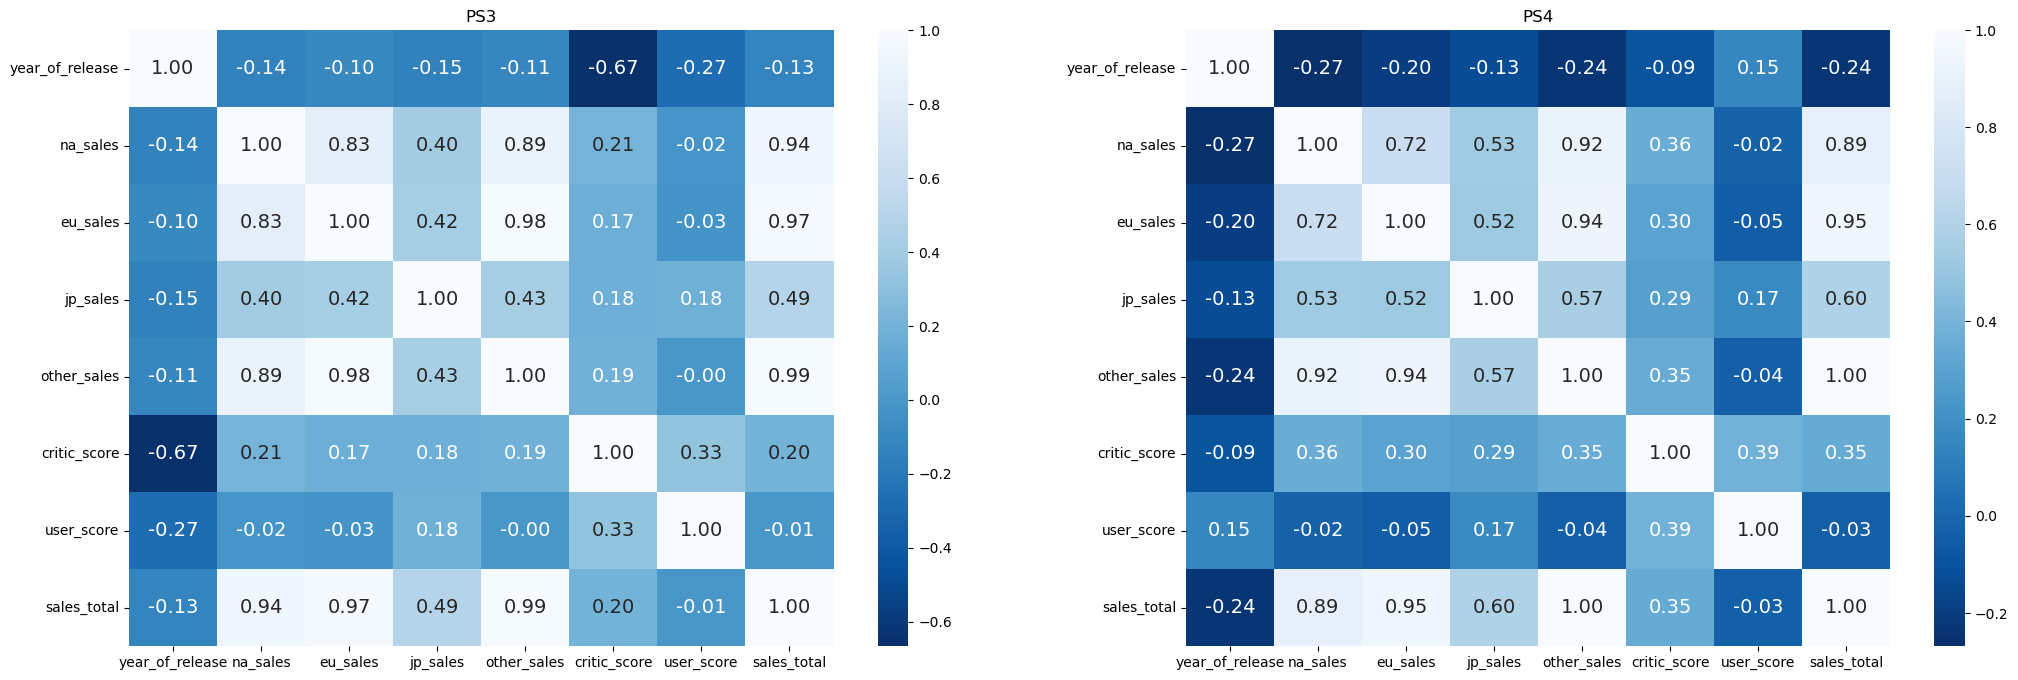

In [63]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(ps3_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('PS3')

sns.heatmap(ps4_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('PS4')
plt.show()

* The situation is similar on PlayStation 3 or 4 platforms
* Critical evaluation has an impact.
* The user rating is zero or weakly negative.

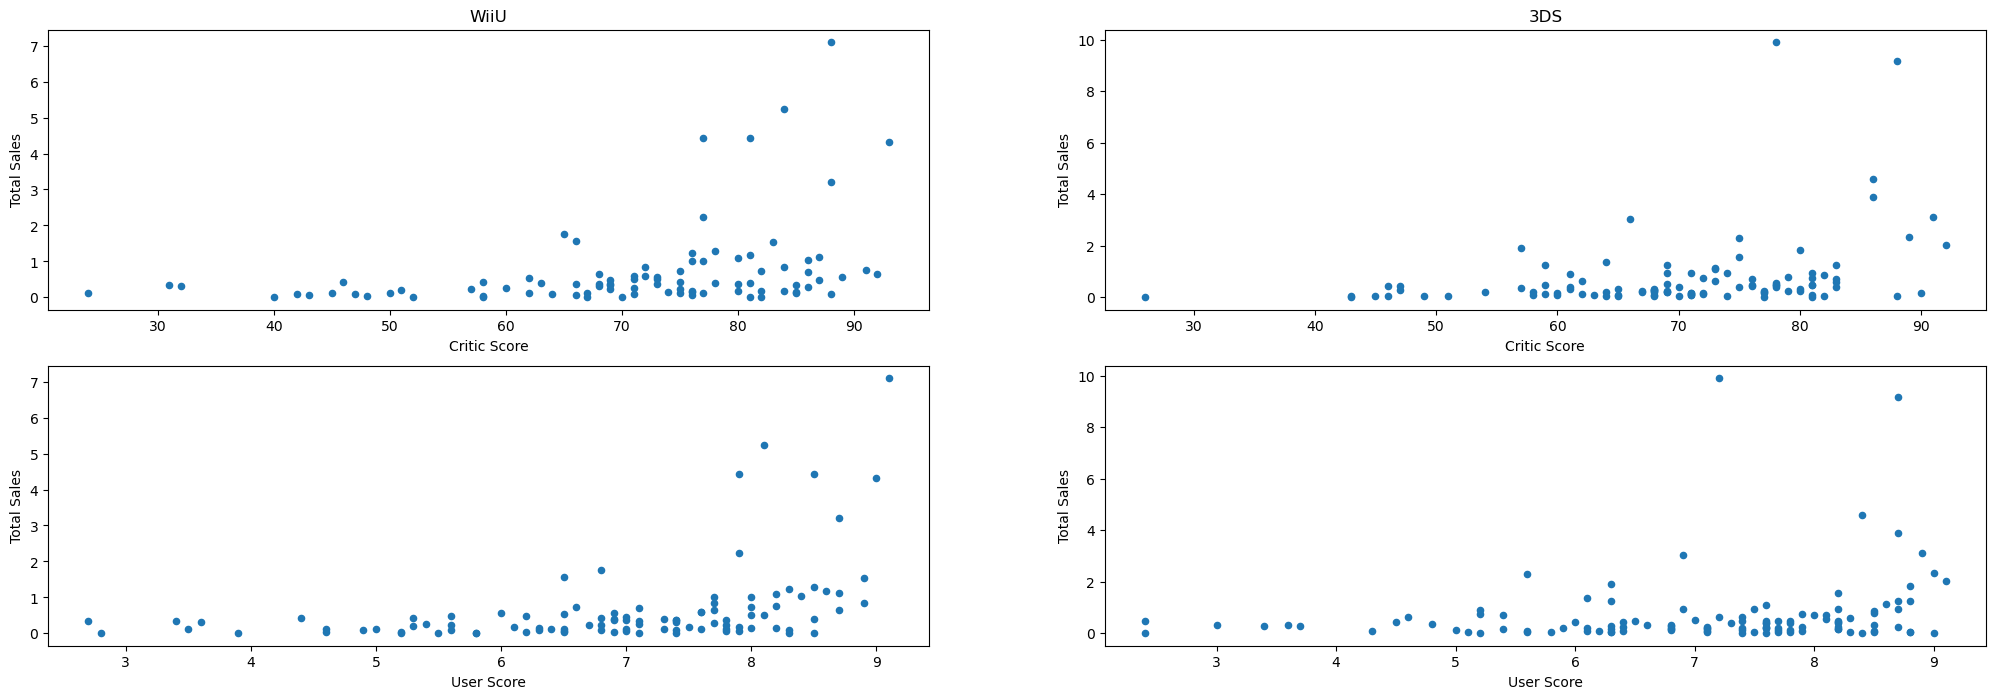

In [64]:
wiiu_critic = actual_time.query("platform == 'WiiU' and critic_score > 0") 
wiiu_user = actual_time.query("platform == 'WiiU' and user_score > 0")
ds3_critic = actual_time.query("platform == '3DS' and critic_score > 0") 
ds3_user = actual_time.query("platform == '3DS' and user_score > 0")

fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(25,8))

wiiu_critic.plot(kind='scatter', ax=axs[0,0], x='critic_score', y='sales_total')
axs[0,0].set_title('WiiU')
axs[0,0].set_ylabel('Total Sales')
axs[0,0].set_xlabel('Critic Score')

wiiu_user.plot(kind='scatter', ax=axs[1,0], x='user_score', y='sales_total')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].set_xlabel('User Score')

ds3_critic.plot(kind='scatter', ax=axs[0,1], x='critic_score', y='sales_total')
axs[0,1].set_title('3DS')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].set_xlabel('Critic Score')

ds3_user.plot(kind='scatter', ax=axs[1,1], x='user_score', y='sales_total')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].set_xlabel('User Score')
plt.show()

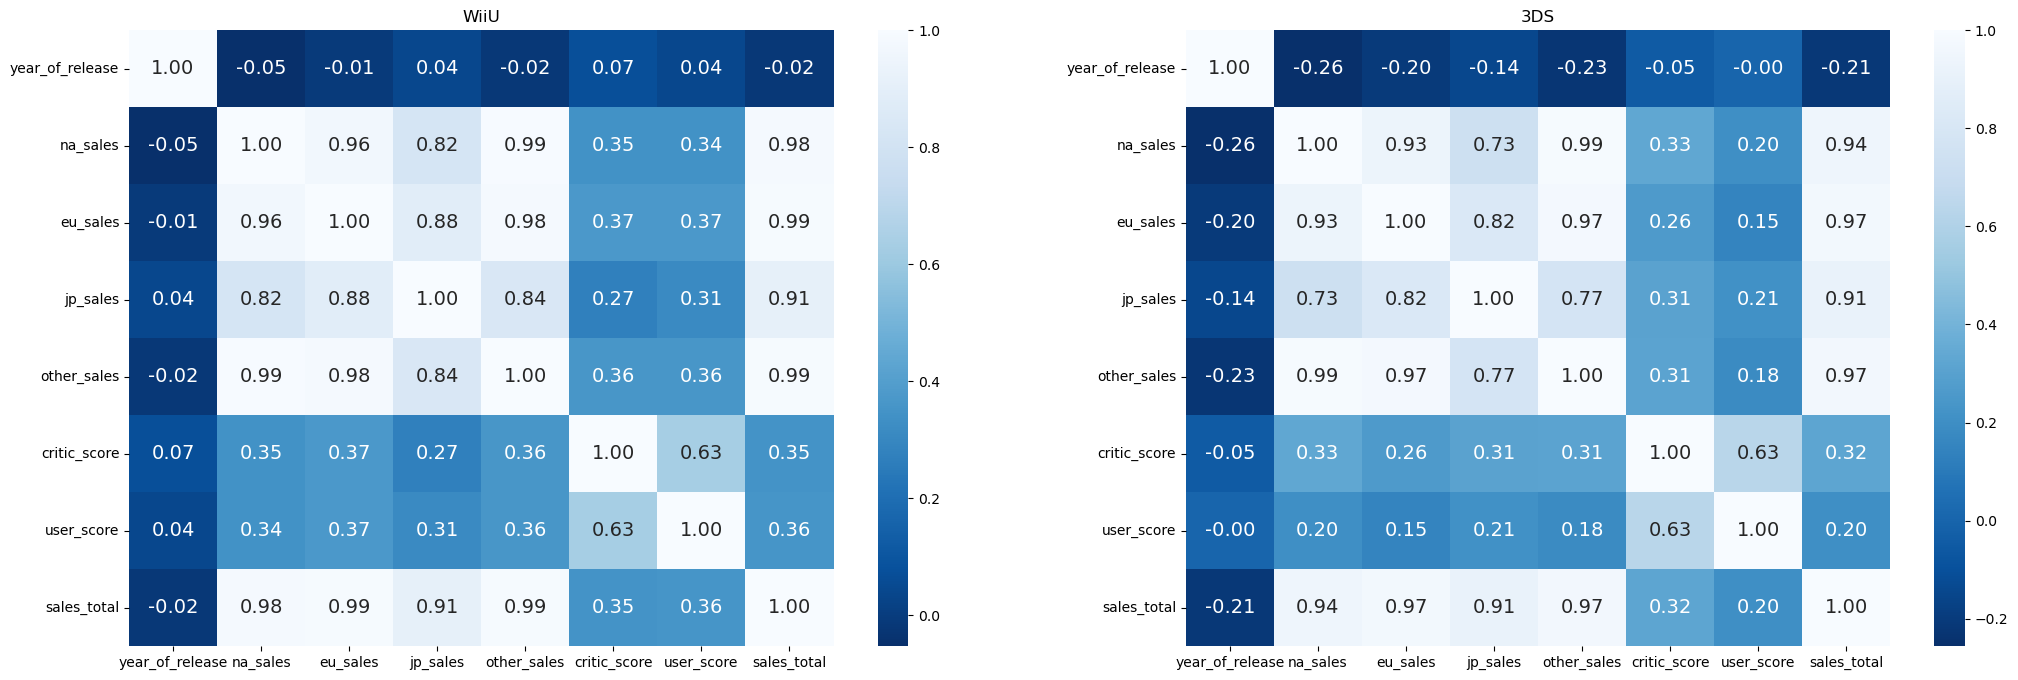

In [65]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(wiiu_critic.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('WiiU')

sns.heatmap(ds3_critic.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('3DS')
plt.show()

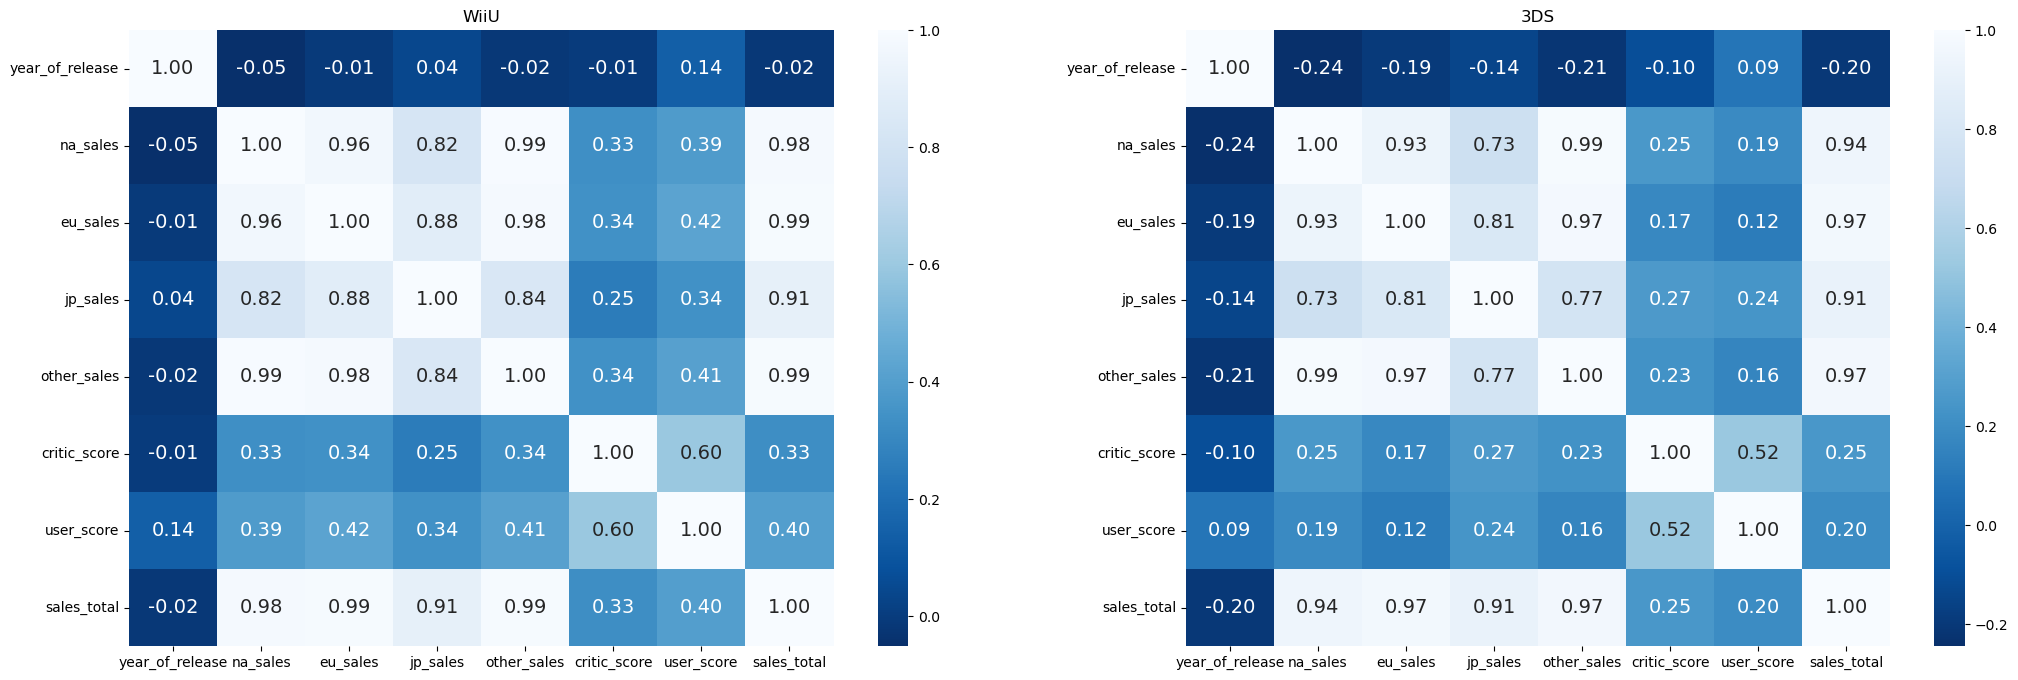

In [66]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(25, 8))

sns.heatmap(wiiu_user.corr(), ax = axs[0], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[0].set_title('WiiU')

sns.heatmap(ds3_user.corr(), ax = axs[1], annot=True, cmap="Blues_r", fmt='.2f', annot_kws={'size':14})
axs[1].set_title('3DS')
plt.show()

But with these platforms there are no such results.Which were higher.
* WiiU and the evaluation by critics and the evaluation by users have an impact on sales, and as you can see, the evaluation by users is even a little more.
* In 3DS, both critics and users influence sales.

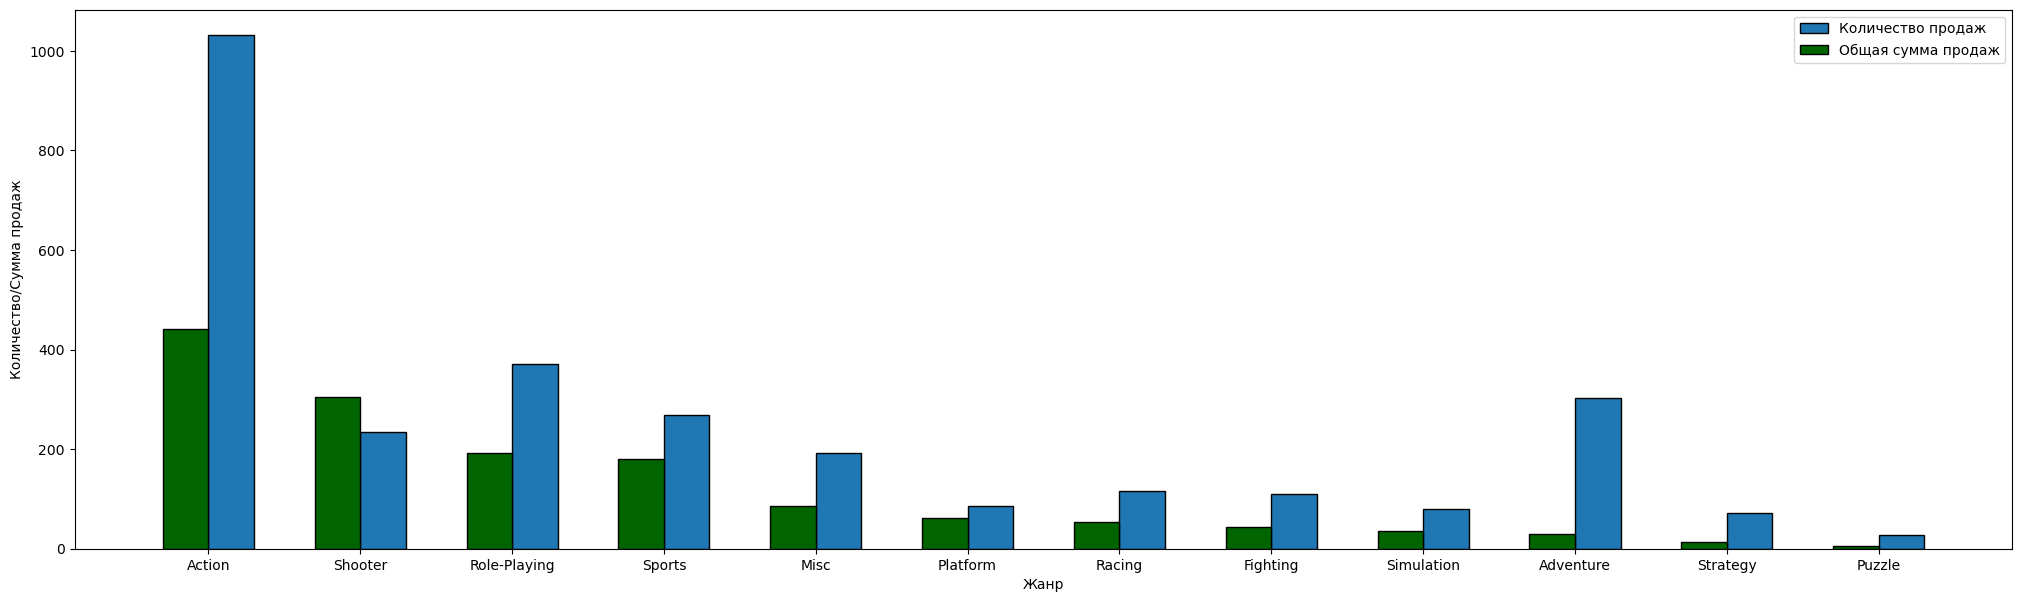

In [67]:
genre_pivot = actual_time.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='sales_total', ascending=False)

fig, ax = plt.subplots(figsize=(25, 7))
ax.bar(genre_pivot.index, genre_pivot['name'], width=0.3, align='edge', edgecolor='black')
ax.bar(genre_pivot.index, genre_pivot['sales_total'], width=-0.3, align='edge', edgecolor='black', color='darkgreen')

ax.set_xlabel('Жанр')
ax.set_ylabel('Количество/Сумма продаж')
ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

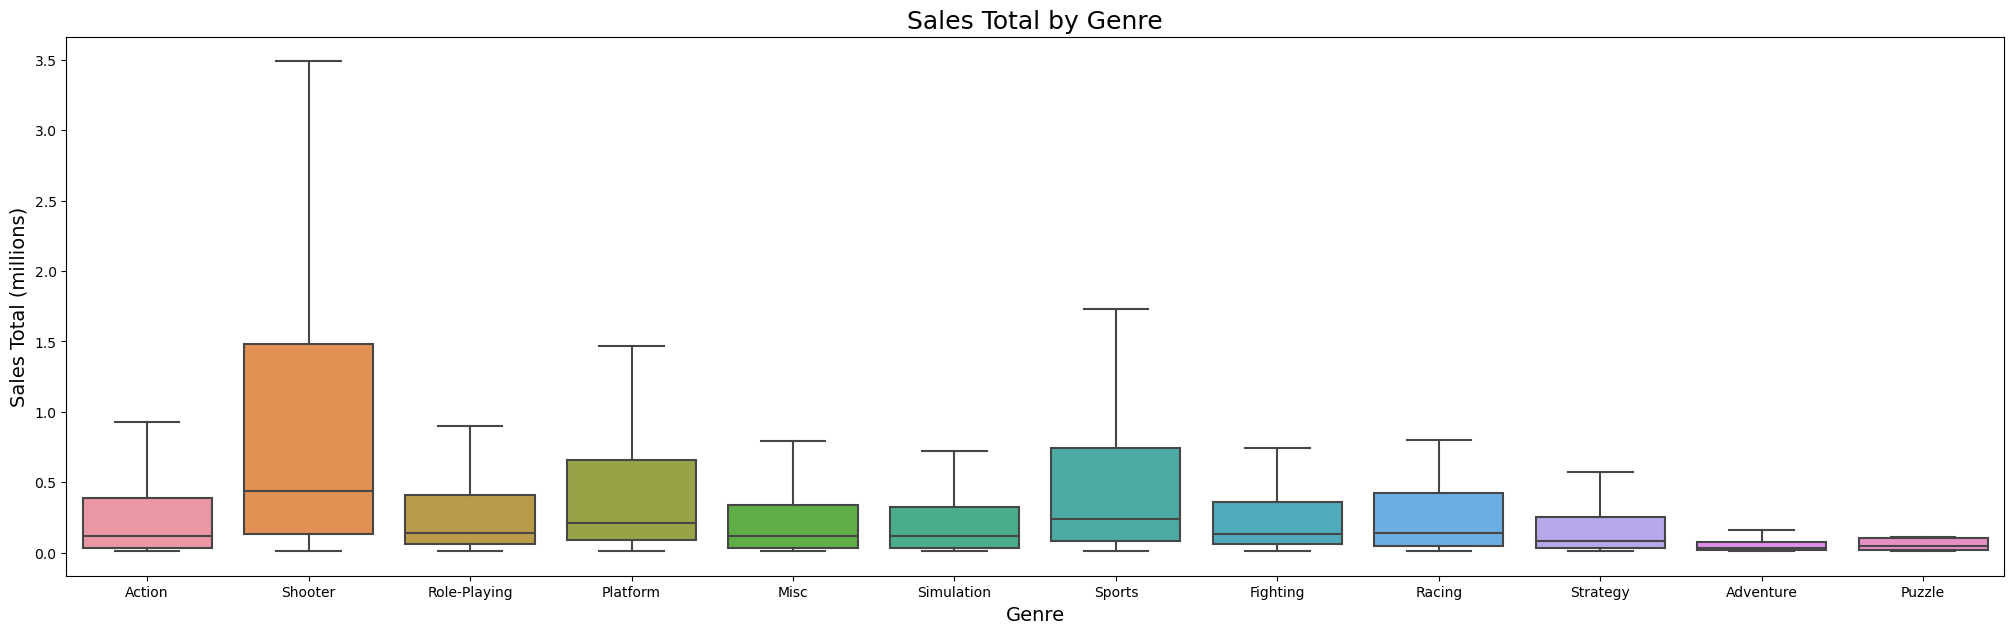

In [68]:
fig, ax = plt.subplots(figsize=(25,7))
sns.boxplot(data=actual_time, x='genre', y='sales_total', ax=ax, showfliers=False)
ax.set_title('Sales Total by Genre', fontsize=18)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Sales Total (millions)', fontsize=14)
plt.show()

In [69]:
actual_time.groupby('genre')['sales_total'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Sports,268.0,0.675634,1.136378,0.01,0.080,0.240,0.7425,8.58
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Simulation,80.0,0.439000,1.244500,0.01,0.030,0.120,0.3275,9.17
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55


Shooter, Platform, Sports, Role-Playing, Racing, are among the top five in terms of median sales across all platforms. 
These are the genres that are sold consistently on all platforms.

**Output:**

* The rapid growth of the release of games begins in 1994. The peak for console and computer games falls on 2008-2009, then the decline begins.

* The most popular gaming platforms of all time: PS, DS, WII, PS3, X360, PS2. Almost all gaming platforms have been around for about 10 years on average. The peak of the release of games comes around the middle of the console's life. PC is the longest-lived platform. The actual period for the forecast for 2017 was taken from 2012 to 2016. This period was chosen due to the fact that only current platforms have already been left and the data for 2016 is incomplete.

* From the data obtained, we see that the PS4 and XONE consoles are in the top sales. According to the data, it is clear that almost all platforms are in the stage of declining indicators. Potentially profitable platforms will be considered: PS4, XONE, 3DS.

* It is noticeable that almost all platforms have most of the values greater than the median. For XONE, X360, WIIU, WII, PS4 platforms, the median is around 0.2. PS4 and XONE have the longest number of successfully sold games, followed by WIIU.
* Found out that critical evaluation has a role in sales (but not on all platforms equally). But the evaluation by users practically does not affect sales in America and Europe, and in Japan user reviews have an impact on sales.
* According to median sales, Shooter, Platform, Sports, Role-Playing, Racing, are in the top five in sales, across all platforms. These are the genres that are sold consistently on all platforms.

## 4. Portrait of the user of the regions NA, EU, JP

**Define for the user of each region (NA, EU, JP):**
* The most popular platforms (top 5). Describe the differences in sales shares.
* The most popular genres (top 5). Explain the difference.
* Does the ESRB rating affect sales in a particular region?

In [70]:
# Create table for each region
top_na = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_eu = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_jp = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:title={'center':'Japan Sales'}, xlabel='platform'>

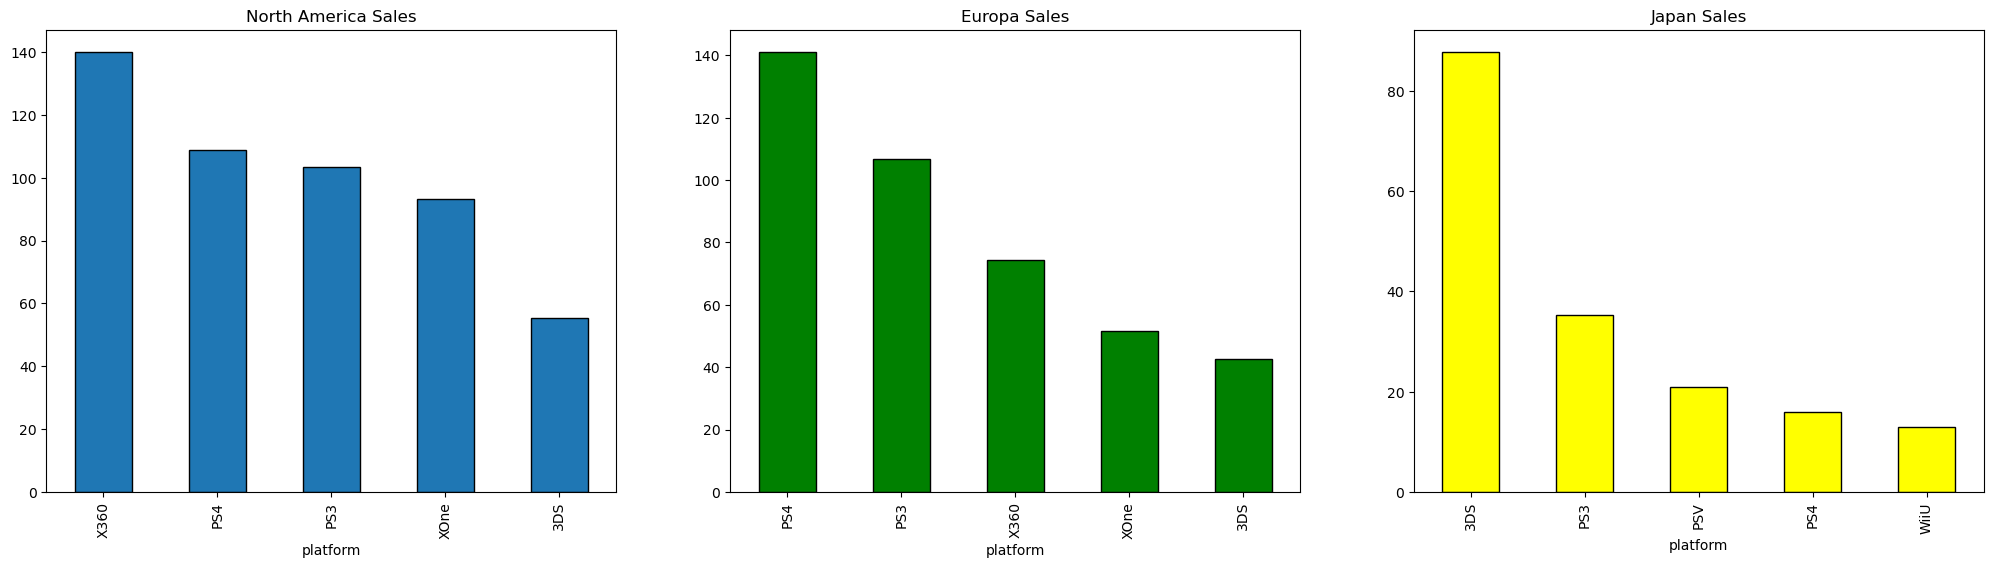

In [71]:
# Create chart
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
top_na.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black')
top_eu.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black')
top_jp.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black')

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\505881452.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_na_other = top_na_.append(pd.Series(other_na, index=['Other']))
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\505881452.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_eu_other = top_eu_.append(pd.Series(other_eu, index=['Other']))
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\505881452.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_jp_other = top_jp_.append(pd.Series(other_jp, index=['Other']))


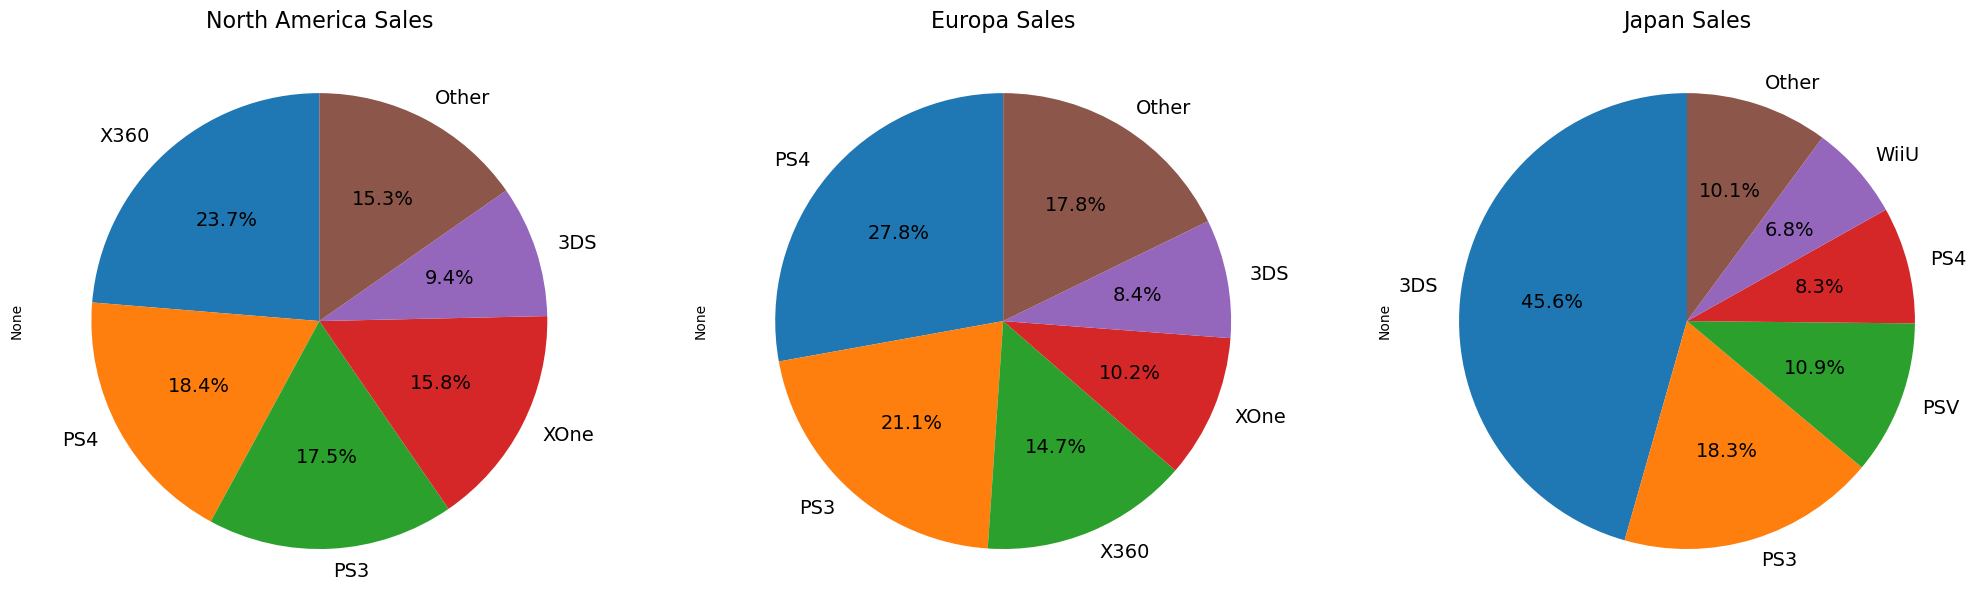

In [72]:
# seria of top-5
top_na_ = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
top_eu_ = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
top_jp_ = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

other_na = actual_time.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu = actual_time.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp = actual_time.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

top_na_other = top_na_.append(pd.Series(other_na, index=['Other']))
top_eu_other = top_eu_.append(pd.Series(other_eu, index=['Other']))
top_jp_other = top_jp_.append(pd.Series(other_jp, index=['Other']))

# create 3 div
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

# create pie-charts
top_na_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
top_eu_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
top_jp_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)

# create names
axs[0].set_title('North America Sales', fontsize=16)
axs[1].set_title('Europa Sales', fontsize=16)
axs[2].set_title('Japan Sales', fontsize=16)


plt.show()

* * In North America, the top X360 platform is slightly behind PS4, then PS3, Xbox One and closes the top five 3DS.America loves Xbox.
* * In Europe, PS4 and PS3 are the leaders, then X360, Xbox One and 3DS also closes the top five. Europeans love PlayStation.
* In Japan, as usual, the opposite is true. The leader is 3DS. Behind them PS3 and PSV and closes the PS4. . Japan loves only its products and they don't play much on Xbox.

In [73]:
# Create chart for regions
na_genre = actual_time.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
eu_genre = actual_time.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
jp_genre = actual_time.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

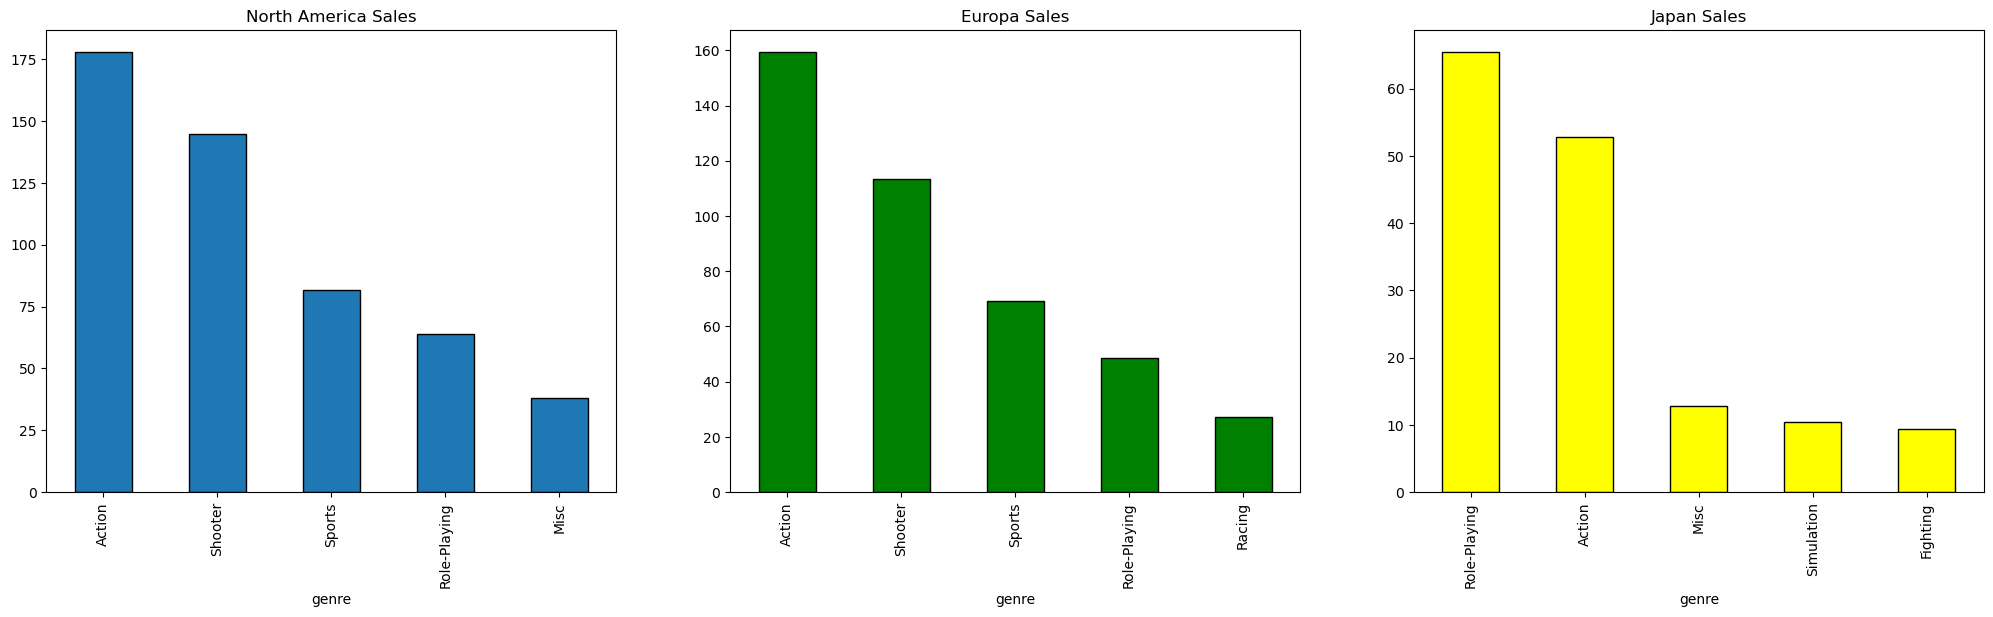

In [74]:

fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
na_genre.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black', legend=False)
eu_genre.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black', legend=False)
jp_genre.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black', legend=False)
plt.show()

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\215907605.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_genre_other = na_genre_.append(pd.Series(other_na_genre, index=['Other']))
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\215907605.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_genre_other = eu_genre_.append(pd.Series(other_eu_genre, index=['Other']))
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_21132\215907605.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_genre_other = jp_genre_.append(pd.Series(other_jp_genre, index=['Other']))


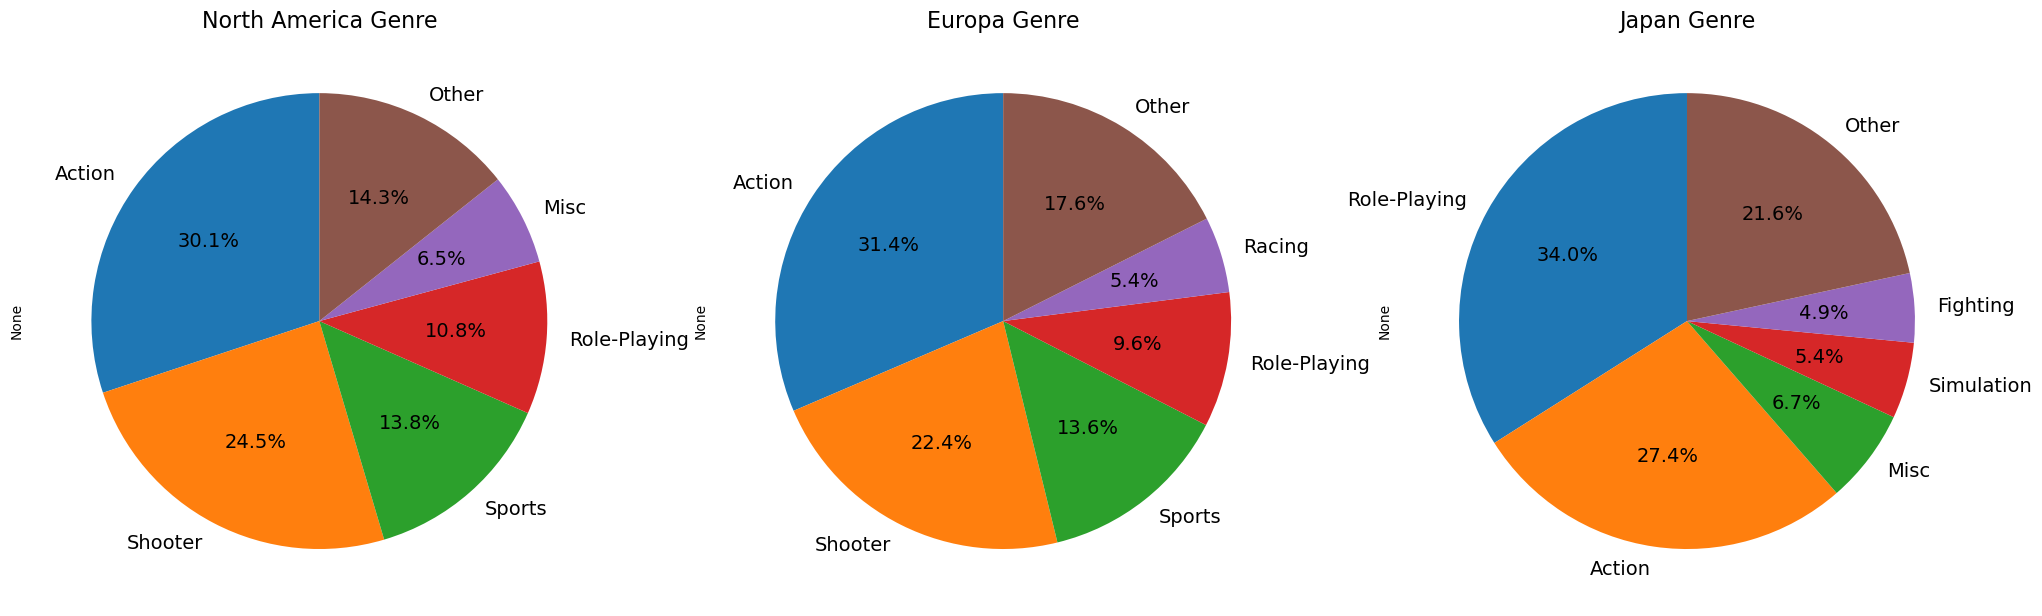

In [75]:

na_genre_ = actual_time.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_genre_ = actual_time.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_genre_ = actual_time.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]


other_na_genre = actual_time.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu_genre = actual_time.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp_genre = actual_time.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

na_genre_other = na_genre_.append(pd.Series(other_na_genre, index=['Other']))
eu_genre_other = eu_genre_.append(pd.Series(other_eu_genre, index=['Other']))
jp_genre_other = jp_genre_.append(pd.Series(other_jp_genre, index=['Other']))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))


na_genre_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
eu_genre_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
jp_genre_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)


axs[0].set_title('North America Genre', fontsize=16)
axs[1].set_title('Europa Genre', fontsize=16)
axs[2].set_title('Japan Genre', fontsize=16)

plt.show()

* Tastes in North America and Europe are similar: fans of action games, sports games and shooters live there.Role-playing games are in 4th place. In North America, they play platformers more, while in Europe they choose racing more often.


* In Japan, the taste is completely different - role-playing games are in the first place, and by a large margin. Further actions.Mixes and simulators.

In [76]:

na_rating = actual_time.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
eu_rating = actual_time.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
jp_rating = actual_time.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

<AxesSubplot:title={'center':'Japan Sales'}, xlabel='rating'>

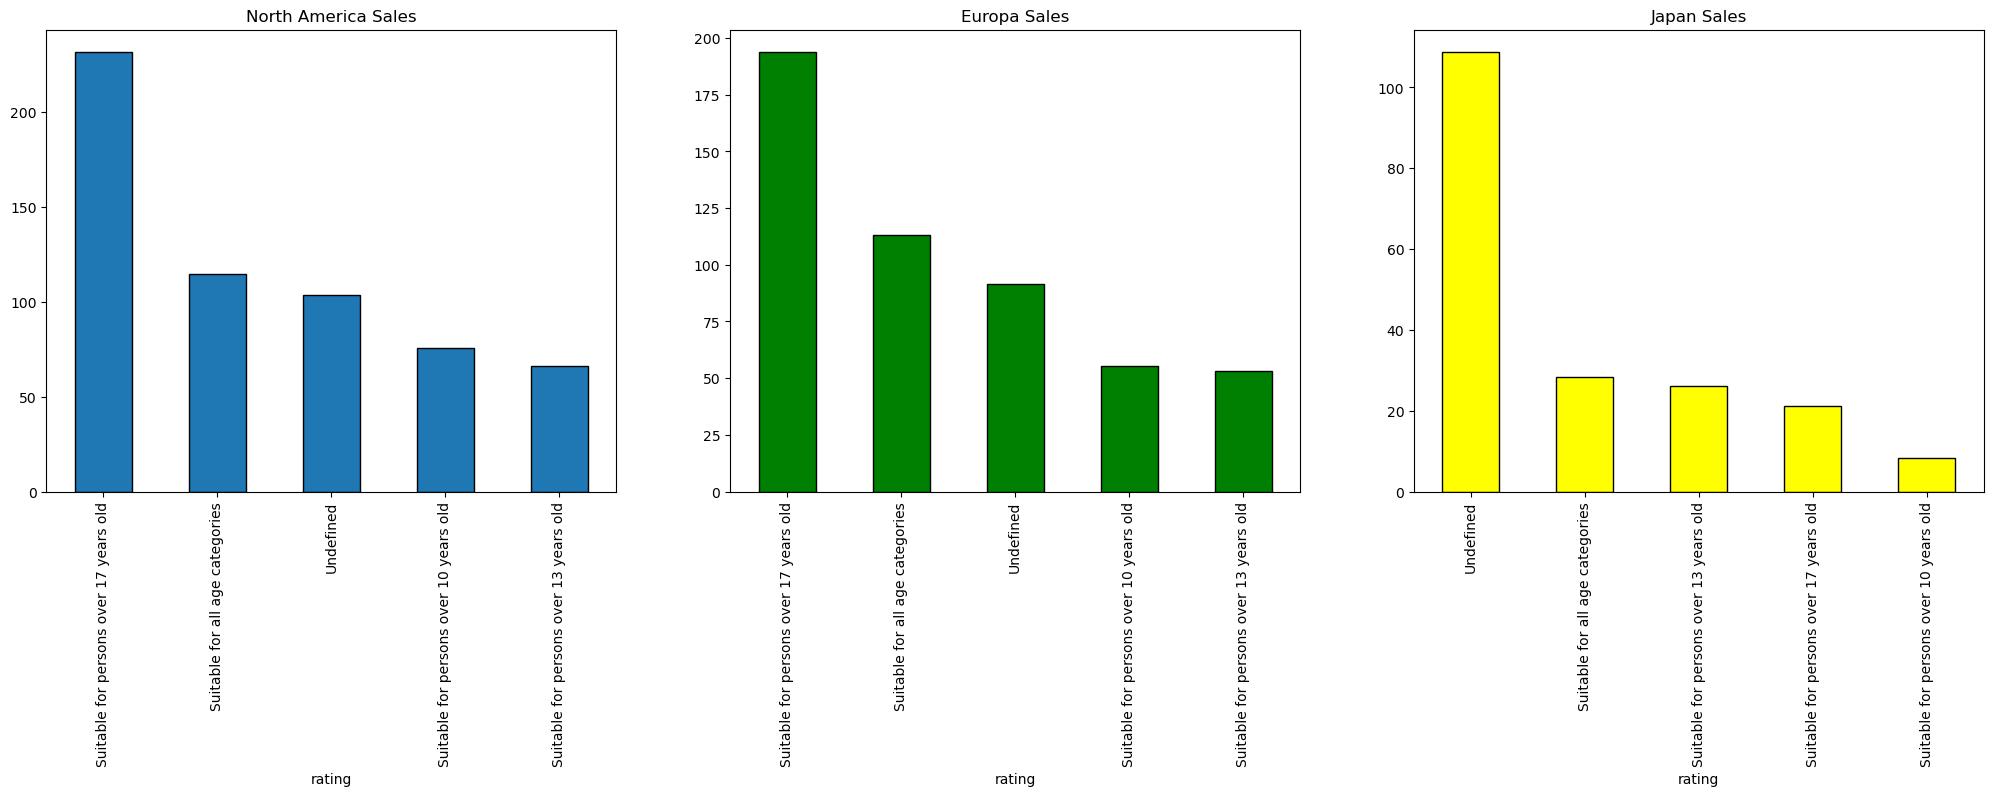

In [77]:

fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(25,6))
na_rating.plot(kind='bar', ax = axs[0], title='North America Sales', ec='black', legend=False)
eu_rating.plot(kind='bar', ax = axs[1], title='Europa Sales', color='green', ec='black', legend=False)
jp_rating.plot(kind='bar', ax = axs[2], title='Japan Sales', color='yellow', ec='black', legend=False)

* In America and Europe, the situation is similar or rather identical. In the first place, over 17 years old. And in second place are games for everyone and then with an uncertain rating.(where we had NaN).
* * In Japan, games with an uncertain rating are in first place. But they play on their consoles in their genres, they probably don't assign ESRB ratings. Perhaps they have their own ratings.

## 5. Hypothesis testing

### **Hypotheses:**

1. The average user ratings of the Xbox One and PC platforms are the same.
2. Average user ratings of Action and Sports genres are different.

**To test both hypotheses, we will use the Student's t-test, since in both cases the samples are independent of each other.
Let's define the threshold value alpha = 0.05**

1. The average user ratings of the Xbox One and PC platforms are the same.

* H0 (null hypothesis) - the average user ratings of the Xbox One and PC platforms are the same.
* H1 (alternative hypothesis) - the average user ratings of the Xbox One and PC platforms differ from each other.

In [78]:
xbox_one = actual_time.query("platform == 'XOne' and user_score > 0")['user_score']
pc = actual_time.query("platform == 'PC' and user_score > 0")['user_score']

In [79]:

xbox_one.min(), pc.min()

(1.6, 1.4)

In [80]:
results = st.ttest_ind(xbox_one, pc)

In [81]:
alpha = 0.05

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 0.5535080500643661
It was not possible to reject the null hypothesis


**Output:**
It was not possible to reject the null hypothesis, the average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings of Action and Sports genres are different.
* H0: Average user ratings of Action and Sports genres differ from each other. 
* H1: Average user ratings of Action and Sports genres are the same.

In [82]:
action_genre = actual_time.query("genre == 'Action' and user_score > 0")['user_score']
sports_genre = actual_time.query("genre == 'Sports' and user_score > 0")['user_score']

In [83]:
results = st.ttest_ind(action_genre, sports_genre)

In [84]:
alpha = 0.05

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 3.7163089460934874e-26
Reject the null hypothesis


**Output:** Average user ratings of Action and Sports genres are the same.

## 6. General conclusion
* Before analyzing the data, we preprocessed the data: we reduced the column names to lowercase, the necessary columns to the correct data types. Removed the gaps in the columns. Checked for duplicates.
* Determined that the abbreviation TBD means to be determined. Therefore, tbd was replaced with nan for further analysis.
* After analyzing, we found that the rapid growth in the release of games begins in 1994. The peak for console and computer games falls on 2008-2009, then the decline begins.The most popular gaming platforms of all time: PS, DS, WII, PS3, X360, PS2. Almost all gaming platforms have been around for about 10 years on average. The peak of the release of games comes around the middle of the life of the platform. PC is the longest-lived platform. The actual period for the forecast for 2017 was taken from 2012 to 2016. This period was chosen due to the fact that only current platforms have already been left. 
* According to the data, it is clear that almost all platforms are in the stage of declining indicators. Potentially profitable platforms will be considered: PS4, XONE.
* Criticism by critics and user evaluation are not the same thing. If critical evaluation has an impact on sales in all sales markets, then user ratings do not affect in Europe and America, but in Japan they have an impact.
* And we found out that the markets of America and Europe are similar, but the Japanese market is in some sense unique, with its own ratings, genres, platforms. And other approaches are needed to it.


**Recommendations:**
1. When planning an advertising campaign for 2017, it is worth paying special attention to the promotion of the PS4 platform, as well as XONE platforms, in the genre of Sports, Shooter with advertising in America and Europe.With an ESRB rating 'Suitable for persons over 17 years of age' or 'Suitable for all age categories'.
2. It is also worth not forgetting about the peculiarities of the market and adjust advertising specifically for it. The example of Japan shows how the requirements of consumers in one country may differ from the preferences of the majority of users.